# Creating Cohorts of Songs

## Problem Scenario: The customer always looks forward to specialized treatment, whether shopping over an e-commerce website or watching Netflix. They want what they might like to see. To keep the customers engaged, it is also crucial for companies to always present the most relevant information. Spotify is a Swedish audio streaming and media service provider. The company has over 456 million active monthly users, including over 195 million paying subscribers, as of September 2022. The company intends to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features. Each cohort would contain similar types of songs.

## Problem Objective: As a data scientist, you should perform exploratory data analysis and perform cluster analysis to create cohorts of songs. The goal is to gain a better understanding of the various factors that contribute to creating a cohort of songs.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
%matplotlib inline
import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Initial data inspection and data cleaning:Check whether the data has duplicates, missing values, irrelevant (erroneous entries) values, or outliers.


In [2]:
df=pd.read_csv('rolling_stones_spotify.csv')
df

Unnamed: 0                         name               album  \
0              0   Concert Intro Music - Live  Licked Live In NYC   
1              1   Street Fighting Man - Live  Licked Live In NYC   
2              2           Start Me Up - Live  Licked Live In NYC   
3              3  If You Can't Rock Me - Live  Licked Live In NYC   
4              4            Don’t Stop - Live  Licked Live In NYC   
...          ...                          ...                 ...   
1605        1605                        Carol  The Rolling Stones   
1606        1606                      Tell Me  The Rolling Stones   
1607        1607          Can I Get A Witness  The Rolling Stones   
1608        1608   You Can Make It If You Try  The Rolling Stones   
1609        1609              Walking The Dog  The Rolling Stones   

     release_date  track_number                      id  \
0      2022-06-10             1  2IEkywLJ4ykbhi1yRQvmsT   
1      2022-06-10             2  6GVgVJBKkGJoRfarYRvGTU   
2      2022-06-10             3  1Lu761pZ0dBTGpzxaQoZNW   
3      2022-06-10             4  1agTQzOTUnGNggyckEqiDH   
4      2022-06-10             5  7piGJR8YndQBQWVXv6KtQw   
...           ...           ...                     ...   
1605   1964-04-16             8  08l7M5UpRnffGl0FyuRiQZ   
1606   1964-04-16             9  3JZllQBsTM6WwoJdzFDLhx   
1607   1964-04-16            10  0t2qvfSBQ3Y08lzRRoVTdb   
1608   1964-04-16            11  5ivIs5vwSj0RChOIvlY3On   
1609   1964-04-16            12  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   
1     spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   
2     spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   
3     spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670         0.369   
4     spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   
...                                    ...           ...           ...   
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ        0.1570         0.466   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx        0.0576         0.509   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb        0.3710         0.790   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On        0.2170         0.700   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   
1      0.965          0.233000    0.9610    -4.803       0.0759  131.455   
2      0.969          0.400000    0.9560    -4.936       0.1150  130.066   
3      0.985          0.000107    0.8950    -5.535       0.1930  132.994   
4      0.969          0.055900    0.9660    -5.098       0.0930  130.533   
...      ...               ...       ...       ...          ...      ...   
1605   0.932          0.006170    0.3240    -9.214       0.0429  177.340   
1606   0.706          0.000002    0.5160    -9.427       0.0843  122.015   
1607   0.774          0.000000    0.0669    -7.961       0.0720   97.035   
1608   0.546          0.000070    0.1660    -9.567       0.0622  102.634   
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   

      valence  popularity  duration_ms  
0      0.0302          33        48640  
1      0.3180          34       253173  
2      0.3130          34       263160  
3      0.1470          32       305880  
4      0.2060          32       305106  
...       ...         ...          ...  
1605   0.9670          39       154080  
1606   0.4460          36       245266  
1607   0.8350          30       176080  
1608   0.5320          27       121680  
1609   0.9690          35       189186  

[1610 rows x 18 columns]

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [5]:
df.shape

(1610, 17)

In [6]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [7]:
df.describe()

track_number  acousticness  danceability       energy  \
count   1610.000000   1610.000000   1610.000000  1610.000000   
mean       8.613665      0.250475      0.468860     0.792352   
std        6.560220      0.227397      0.141775     0.179886   
min        1.000000      0.000009      0.104000     0.141000   
25%        4.000000      0.058350      0.362250     0.674000   
50%        7.000000      0.183000      0.458000     0.848500   
75%       11.000000      0.403750      0.578000     0.945000   
max       47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

In [8]:
df

name               album release_date  \
0      Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1      Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2              Start Me Up - Live  Licked Live In NYC   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4               Don’t Stop - Live  Licked Live In NYC   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
0                1  2IEkywLJ4ykbhi1yRQvmsT   
1                2  6GVgVJBKkGJoRfarYRvGTU   
2                3  1Lu761pZ0dBTGpzxaQoZNW   
3                4  1agTQzOTUnGNggyckEqiDH   
4                5  7piGJR8YndQBQWVXv6KtQw   
...            ...                     ...   
1605             8  08l7M5UpRnffGl0FyuRiQZ   
1606             9  3JZllQBsTM6WwoJdzFDLhx   
1607            10  0t2qvfSBQ3Y08lzRRoVTdb   
1608            11  5ivIs5vwSj0RChOIvlY3On   
1609            12  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   
1     spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   
2     spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   
3     spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670         0.369   
4     spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   
...                                    ...           ...           ...   
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ        0.1570         0.466   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx        0.0576         0.509   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb        0.3710         0.790   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On        0.2170         0.700   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   
1      0.965          0.233000    0.9610    -4.803       0.0759  131.455   
2      0.969          0.400000    0.9560    -4.936       0.1150  130.066   
3      0.985          0.000107    0.8950    -5.535       0.1930  132.994   
4      0.969          0.055900    0.9660    -5.098       0.0930  130.533   
...      ...               ...       ...       ...          ...      ...   
1605   0.932          0.006170    0.3240    -9.214       0.0429  177.340   
1606   0.706          0.000002    0.5160    -9.427       0.0843  122.015   
1607   0.774          0.000000    0.0669    -7.961       0.0720   97.035   
1608   0.546          0.000070    0.1660    -9.567       0.0622  102.634   
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   

      valence  popularity  duration_ms  
0      0.0302          33        48640  
1      0.3180          34       253173  
2      0.3130          34       263160  
3      0.1470          32       305880  
4      0.2060          32       305106  
...       ...         ...          ...  
1605   0.9670          39       154080  
1606   0.4460          36       245266  
1607   0.8350          30       176080  
1608   0.5320          27       121680  
1609   0.9690          35       189186  

[1610 rows x 17 columns]

In [9]:
df['release_date']=pd.to_datetime(df['release_date'])

In [10]:
df

name               album release_date  \
0      Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1      Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2              Start Me Up - Live  Licked Live In NYC   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4               Don’t Stop - Live  Licked Live In NYC   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
0                1  2IEkywLJ4ykbhi1yRQvmsT   
1                2  6GVgVJBKkGJoRfarYRvGTU   
2                3  1Lu761pZ0dBTGpzxaQoZNW   
3                4  1agTQzOTUnGNggyckEqiDH   
4                5  7piGJR8YndQBQWVXv6KtQw   
...            ...                     ...   
1605             8  08l7M5UpRnffGl0FyuRiQZ   
1606             9  3JZllQBsTM6WwoJdzFDLhx   
1607            10  0t2qvfSBQ3Y08lzRRoVTdb   
1608            11  5ivIs5vwSj0RChOIvlY3On   
1609            12  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   
1     spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   
2     spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   
3     spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670         0.369   
4     spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   
...                                    ...           ...           ...   
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ        0.1570         0.466   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx        0.0576         0.509   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb        0.3710         0.790   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On        0.2170         0.700   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   
1      0.965          0.233000    0.9610    -4.803       0.0759  131.455   
2      0.969          0.400000    0.9560    -4.936       0.1150  130.066   
3      0.985          0.000107    0.8950    -5.535       0.1930  132.994   
4      0.969          0.055900    0.9660    -5.098       0.0930  130.533   
...      ...               ...       ...       ...          ...      ...   
1605   0.932          0.006170    0.3240    -9.214       0.0429  177.340   
1606   0.706          0.000002    0.5160    -9.427       0.0843  122.015   
1607   0.774          0.000000    0.0669    -7.961       0.0720   97.035   
1608   0.546          0.000070    0.1660    -9.567       0.0622  102.634   
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   

      valence  popularity  duration_ms  
0      0.0302          33        48640  
1      0.3180          34       253173  
2      0.3130          34       263160  
3      0.1470          32       305880  
4      0.2060          32       305106  
...       ...         ...          ...  
1605   0.9670          39       154080  
1606   0.4460          36       245266  
1607   0.8350          30       176080  
1608   0.5320          27       121680  
1609   0.9690          35       189186  

[1610 rows x 17 columns]

In [11]:
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [12]:
df.duplicated().sum()

0

### Depending on your findings, clean the data for further processing.

<Figure size 1000x600 with 0 Axes>

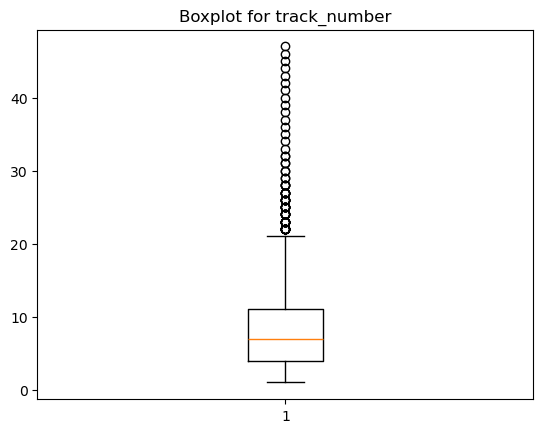

<Figure size 1000x600 with 0 Axes>

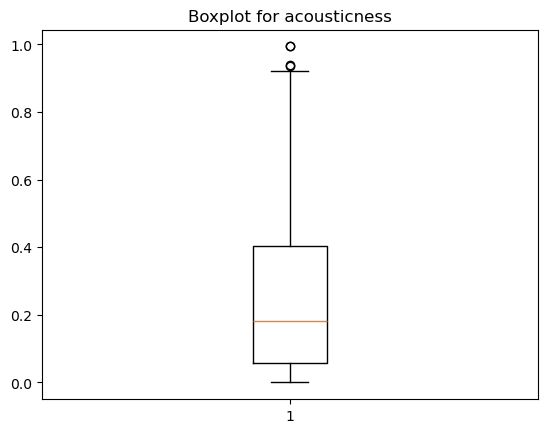

<Figure size 1000x600 with 0 Axes>

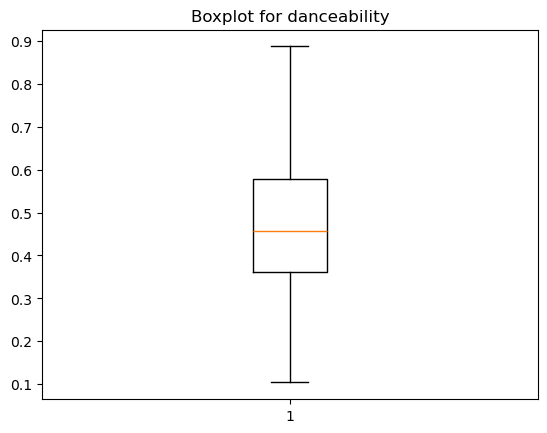

<Figure size 1000x600 with 0 Axes>

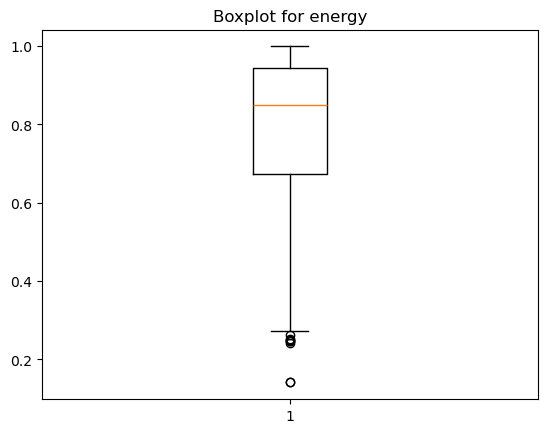

<Figure size 1000x600 with 0 Axes>

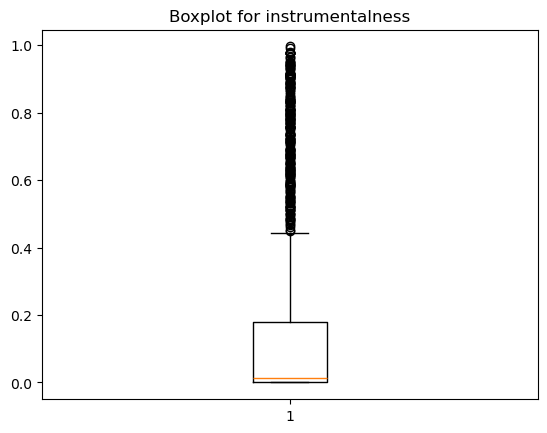

<Figure size 1000x600 with 0 Axes>

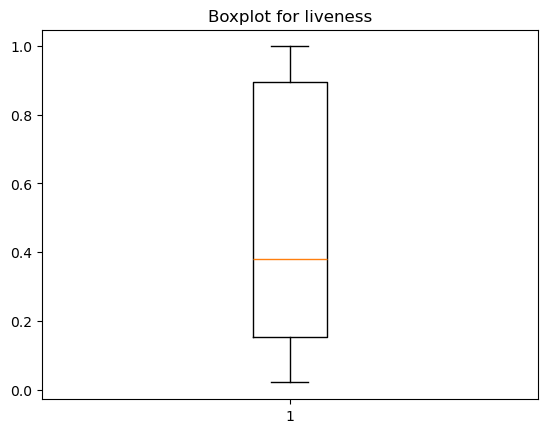

<Figure size 1000x600 with 0 Axes>

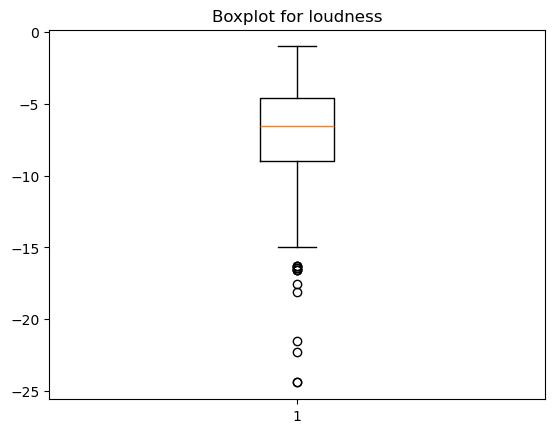

<Figure size 1000x600 with 0 Axes>

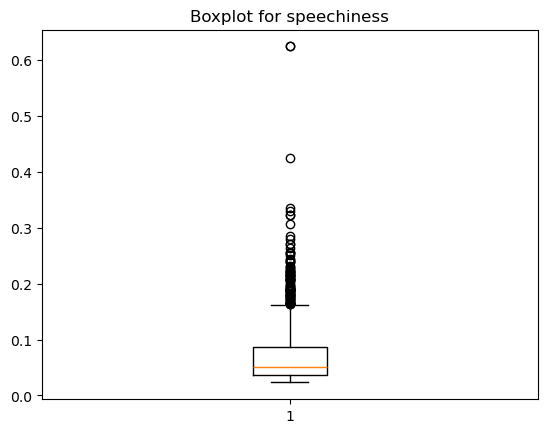

<Figure size 1000x600 with 0 Axes>

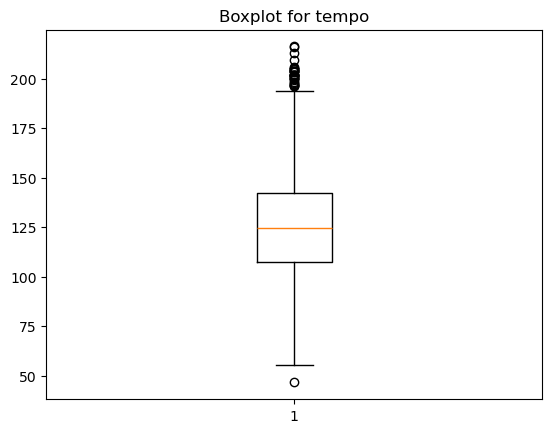

<Figure size 1000x600 with 0 Axes>

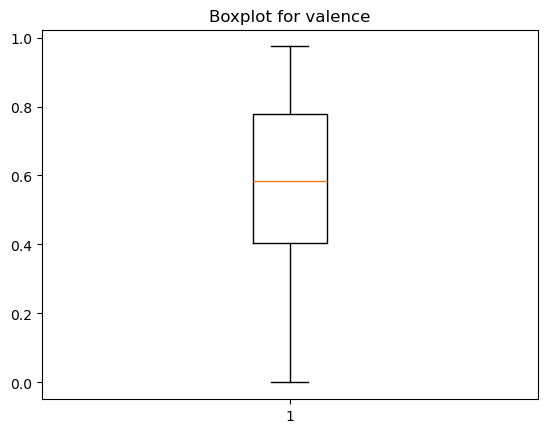

<Figure size 1000x600 with 0 Axes>

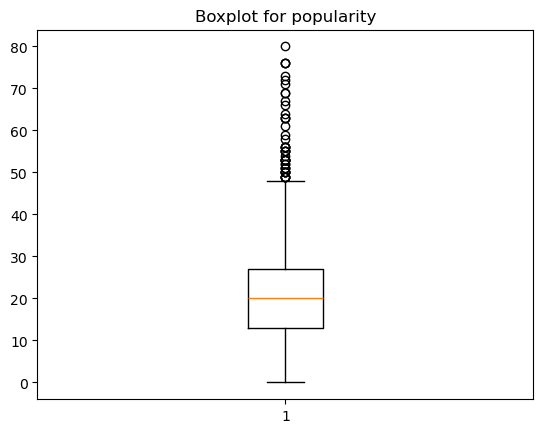

<Figure size 1000x600 with 0 Axes>

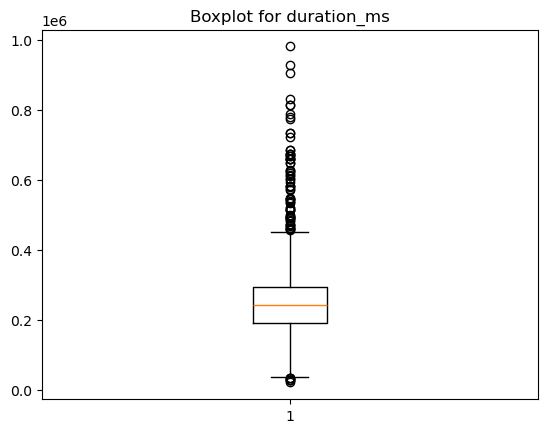

In [13]:
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 6))
    fig, ax = plt.subplots()
    ax.boxplot(df[column],vert=True)
    plt.title(f"Boxplot for {column}")
    plt.show()

In [15]:
def check_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

In [16]:
numerical_columns = df.select_dtypes(include=['number']).columns.drop('track_number')
for column in numerical_columns:
    outliers = check_outliers(df, column)
    print(f"{len(outliers)} outliers detected in column '{column}'")

4 outliers detected in column 'acousticness'
0 outliers detected in column 'danceability'
8 outliers detected in column 'energy'
272 outliers detected in column 'instrumentalness'
0 outliers detected in column 'liveness'
14 outliers detected in column 'loudness'
92 outliers detected in column 'speechiness'
34 outliers detected in column 'tempo'
0 outliers detected in column 'valence'
48 outliers detected in column 'popularity'
76 outliers detected in column 'duration_ms'


### Perform Exploratory Data Analysis and Feature Engineering:

In [17]:
corr_df = df.drop(["name", "album", "release_date","id", "uri"],axis=1).corr()
corr_df

track_number  acousticness  danceability    energy  \
track_number          1.000000     -0.035675     -0.112004  0.096314   
acousticness         -0.035675      1.000000      0.070017 -0.363819   
danceability         -0.112004      0.070017      1.000000 -0.300536   
energy                0.096314     -0.363819     -0.300536  1.000000   
instrumentalness     -0.002772      0.061403     -0.031812  0.120261   
liveness              0.188351     -0.117739     -0.516387  0.511188   
loudness              0.100835     -0.237083     -0.249406  0.698039   
speechiness           0.040617     -0.021774     -0.322684  0.417214   
tempo                -0.023934     -0.171003     -0.324398  0.201885   
valence              -0.104567     -0.138803      0.546210  0.046217   
popularity           -0.145115      0.108046      0.141205 -0.057272   
duration_ms           0.156455      0.039128     -0.220045  0.148876   

                  instrumentalness  liveness  loudness  speechiness     tempo  \
track_number             -0.002772  0.188351  0.100835     0.040617 -0.023934   
acousticness              0.061403 -0.117739 -0.237083    -0.021774 -0.171003   
danceability             -0.031812 -0.516387 -0.249406    -0.322684 -0.324398   
energy                    0.120261  0.511188  0.698039     0.417214  0.201885   
instrumentalness          1.000000  0.008873  0.012524     0.009586  0.010961   
liveness                  0.008873  1.000000  0.327036     0.400018  0.108855   
loudness                  0.012524  0.327036  1.000000     0.189904  0.112837   
speechiness               0.009586  0.400018  0.189904     1.000000  0.192687   
tempo                     0.010961  0.108855  0.112837     0.192687  1.000000   
valence                   0.103480 -0.347451 -0.027571    -0.399751  0.000558   
popularity               -0.010612 -0.205845  0.156323    -0.136745 -0.061061   
duration_ms              -0.137599  0.304735  0.221558     0.114546  0.001465   

                   valence  popularity  duration_ms  
track_number     -0.104567   -0.145115     0.156455  
acousticness     -0.138803    0.108046     0.039128  
danceability      0.546210    0.141205    -0.220045  
energy            0.046217   -0.057272     0.148876  
instrumentalness  0.103480   -0.010612    -0.137599  
liveness         -0.347451   -0.205845     0.304735  
loudness         -0.027571    0.156323     0.221558  
speechiness      -0.399751   -0.136745     0.114546  
tempo             0.000558   -0.061061     0.001465  
valence           1.000000    0.065333    -0.244833  
popularity        0.065333    1.000000     0.074102  
duration_ms      -0.244833    0.074102     1.000000

<Axes: >

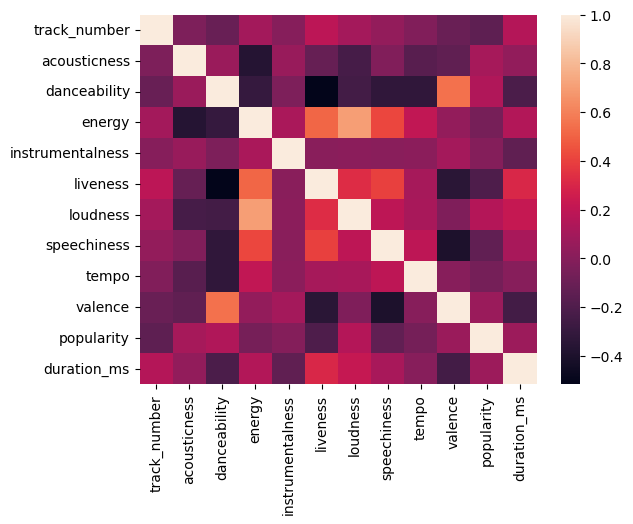

In [18]:
sns.heatmap(corr_df)

#### Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album.

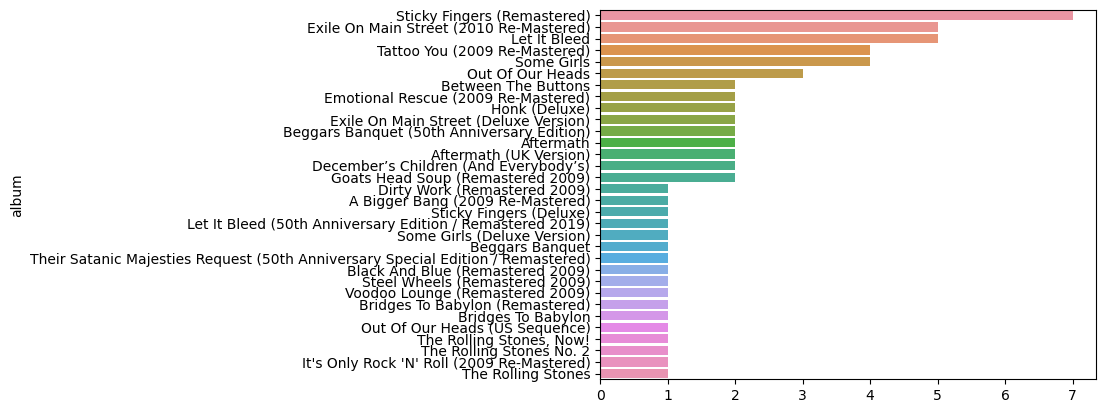

In [19]:
popularity_threshold=45
popular_songs=df.loc[df['popularity']>=popularity_threshold]
top_songs=popular_songs['album'].value_counts().sort_values(ascending=False)
sns.barplot(x=top_songs.values,y=top_songs.index)
plt.show()

Observation:
The best two albums recommend based on the number of popular songs in the album are
- 1 Sticky Fingers (Remastered)
- 2 Exile On Main Street (2010 Re-Mastered)/Let It Bleed

#### Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern.

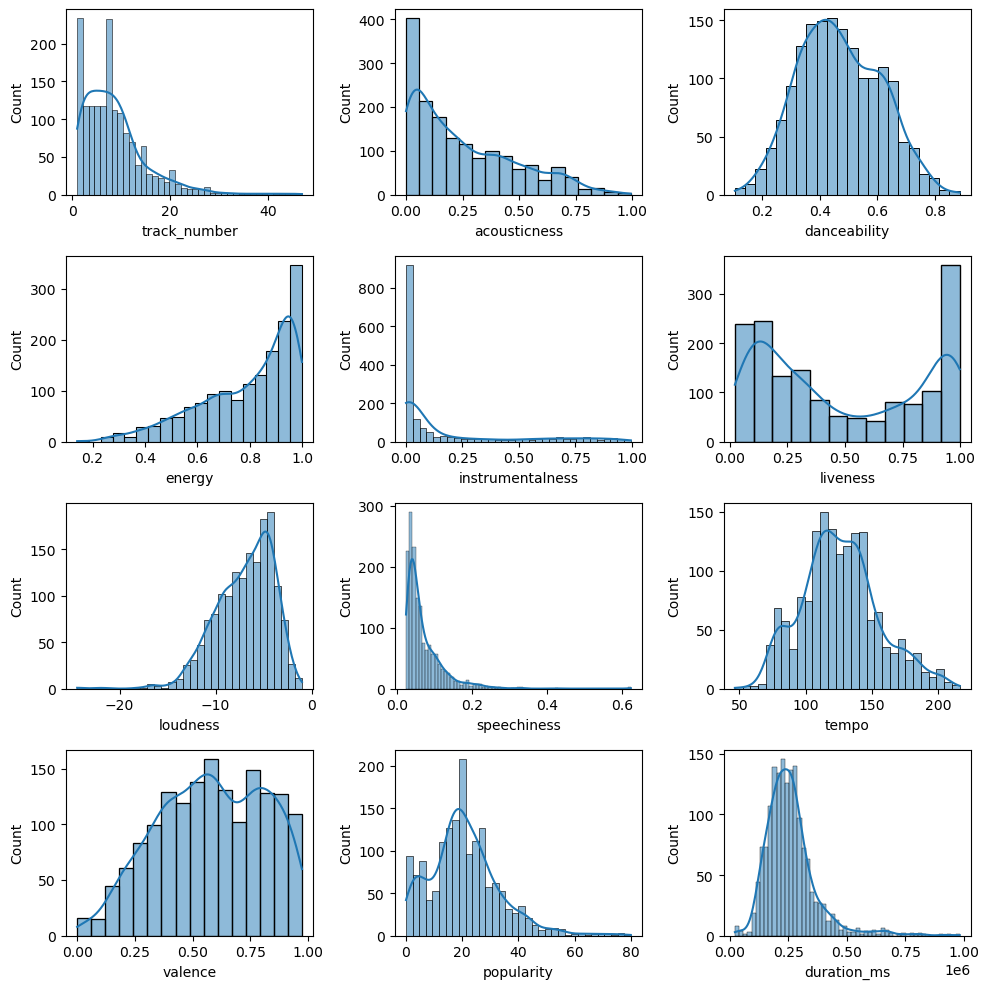

In [20]:
fig,ax=plt.subplots(4,3,figsize=(10,10))
for col,ax in zip(df.select_dtypes('number').columns,ax.flatten()):
    sns.histplot(df[col],kde=True,ax=ax)
plt.tight_layout()
plt.show()

Observation:
- There was some feature who have skewed data distribution

#### Discover how a song's popularity relates to various factors and how this has changed over time.

In [21]:
# Find the years
years=df['release_date'].dt.year.unique()
years=np.flip(years)
years_df=[]
for year in years:
    years_df.append(df[df['release_date'].dt.year==year])

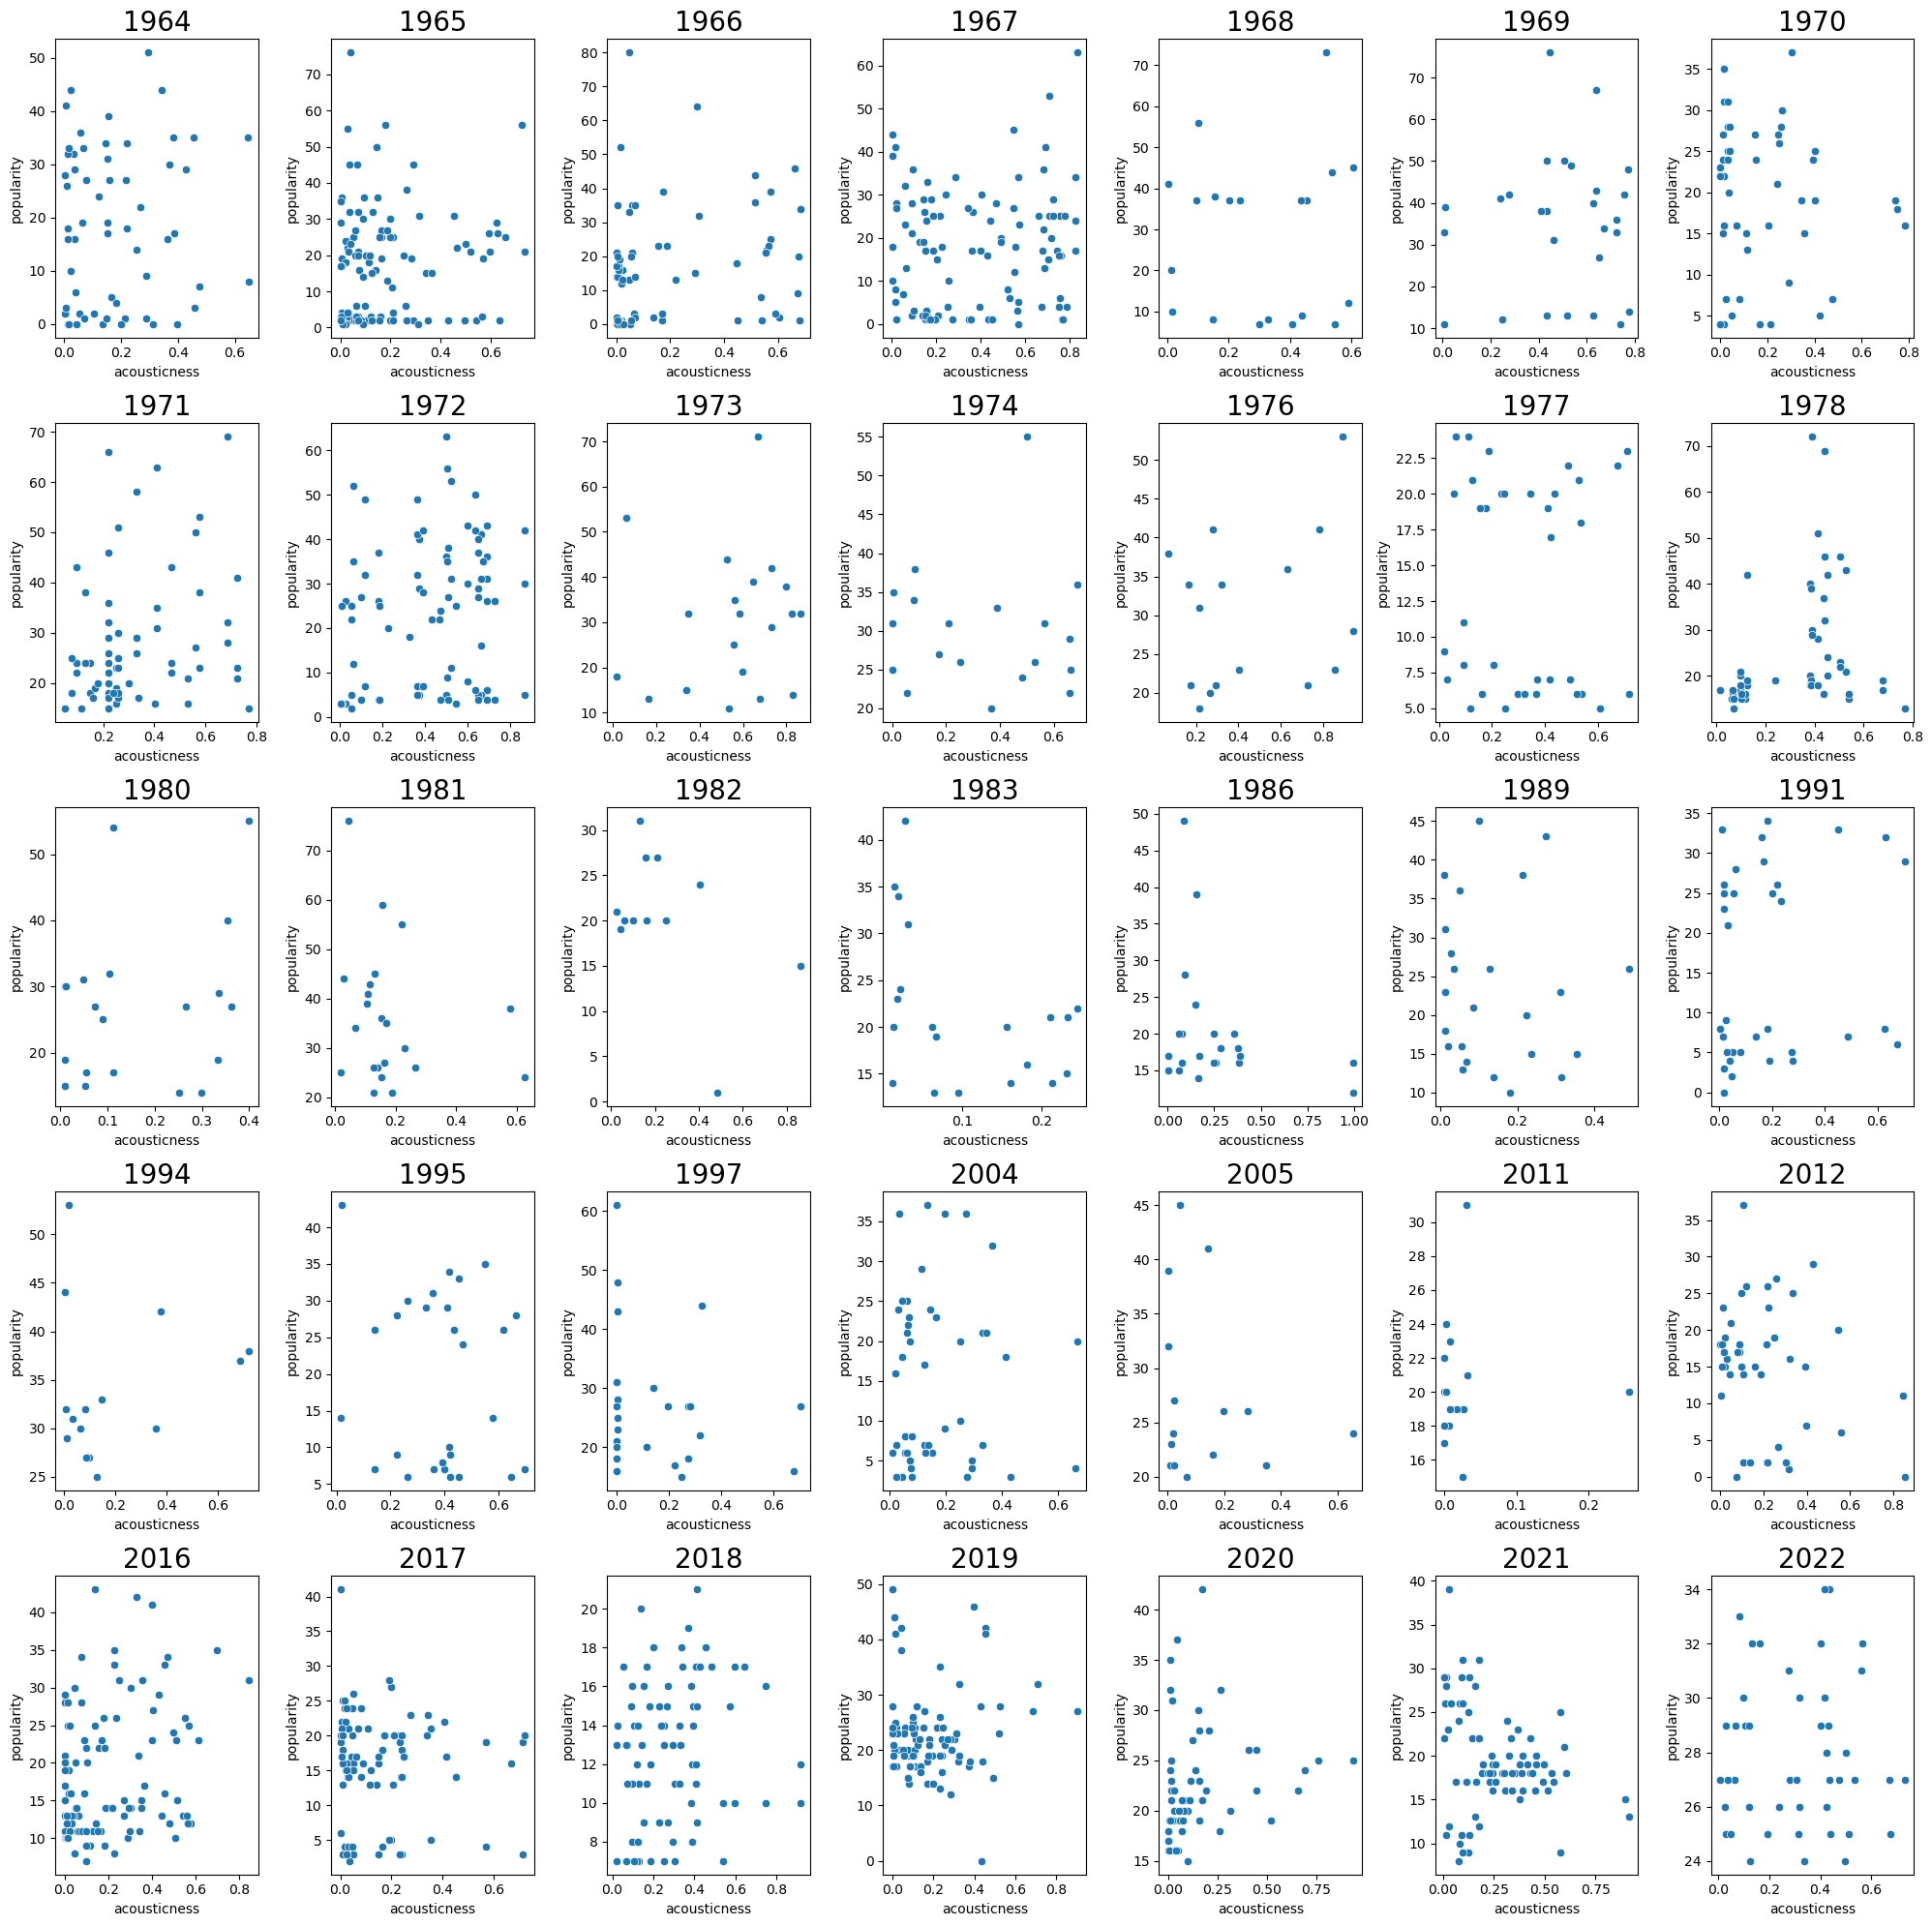

In [22]:
fig,ax=plt.subplots(5,7,figsize=(20,20))
for year,ax in zip(years,ax.flatten()):
    temp_df=df[df['release_date'].dt.year==year]
    sns.scatterplot(data=temp_df,x='acousticness',y='popularity',ax=ax)
    ax.set_title(year,fontsize=20)
plt.tight_layout()
plt.show()

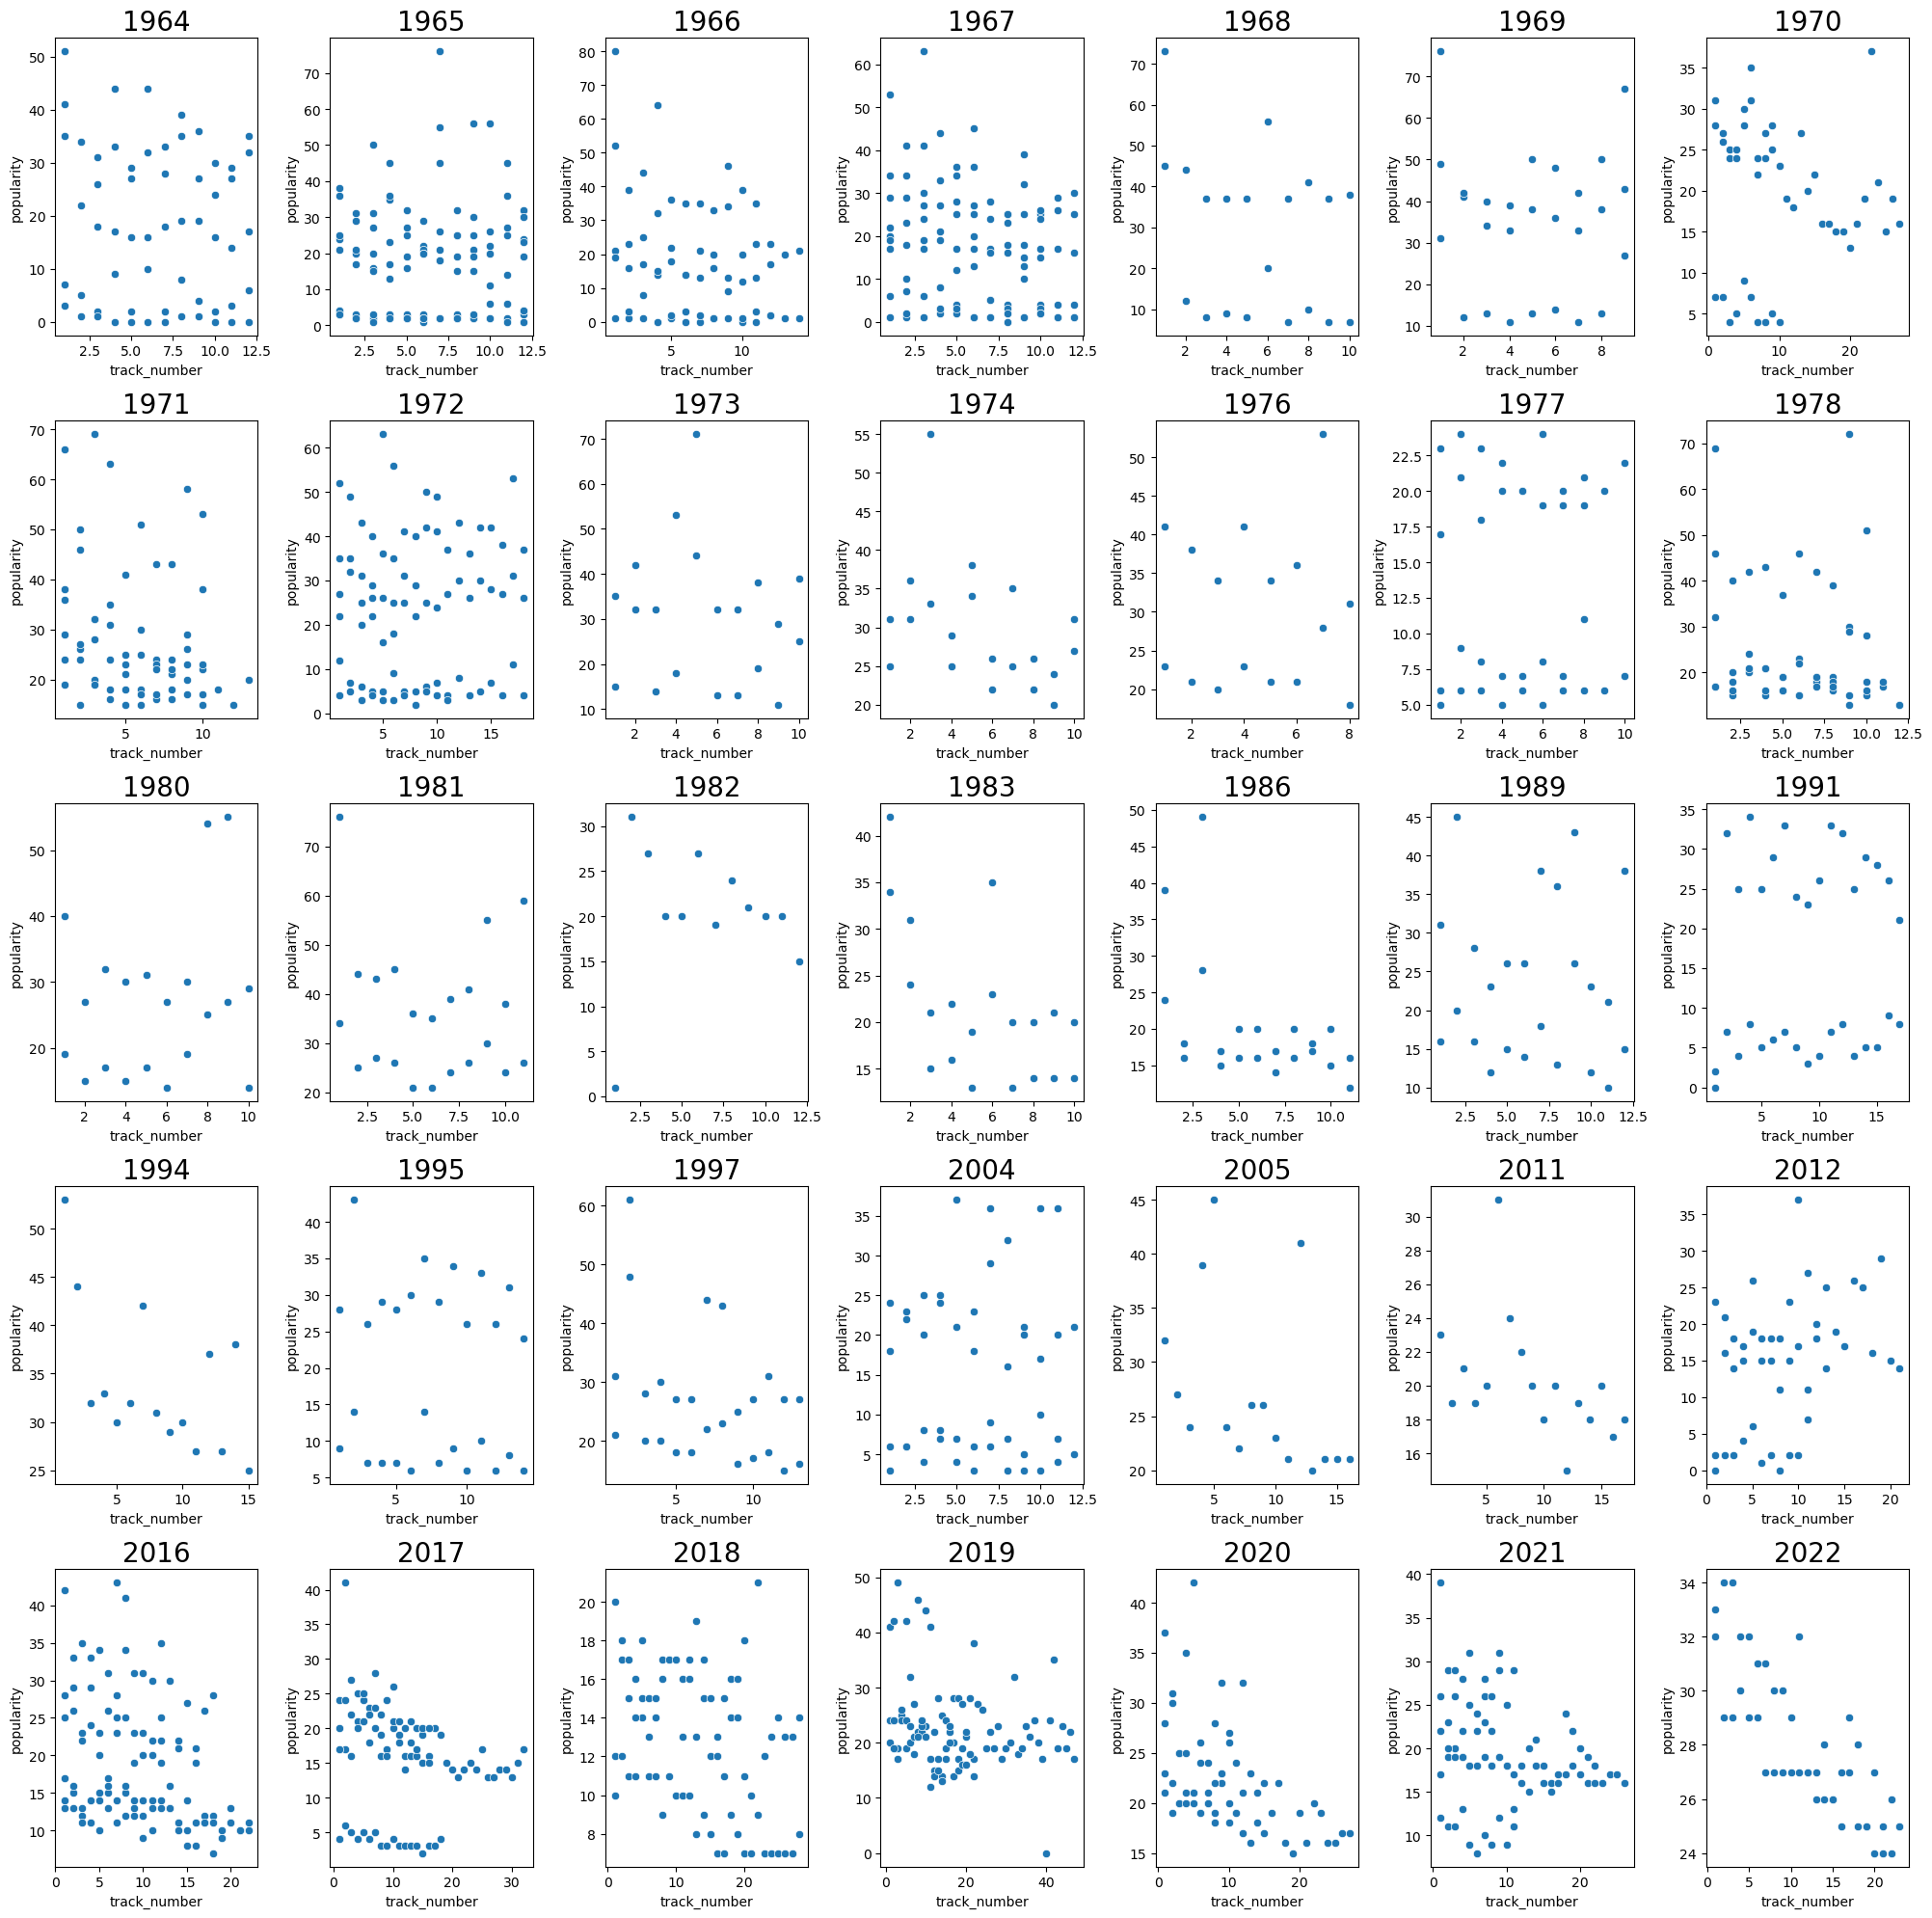

In [23]:
fig,ax=plt.subplots(5,7,figsize=(20,20))
for year,ax in zip(years,ax.flatten()):
    temp_df=df[df['release_date'].dt.year==year]
    sns.scatterplot(data=temp_df,x='track_number',y='popularity',ax=ax)
    ax.set_title(year,fontsize=20)
plt.tight_layout()
plt.show()

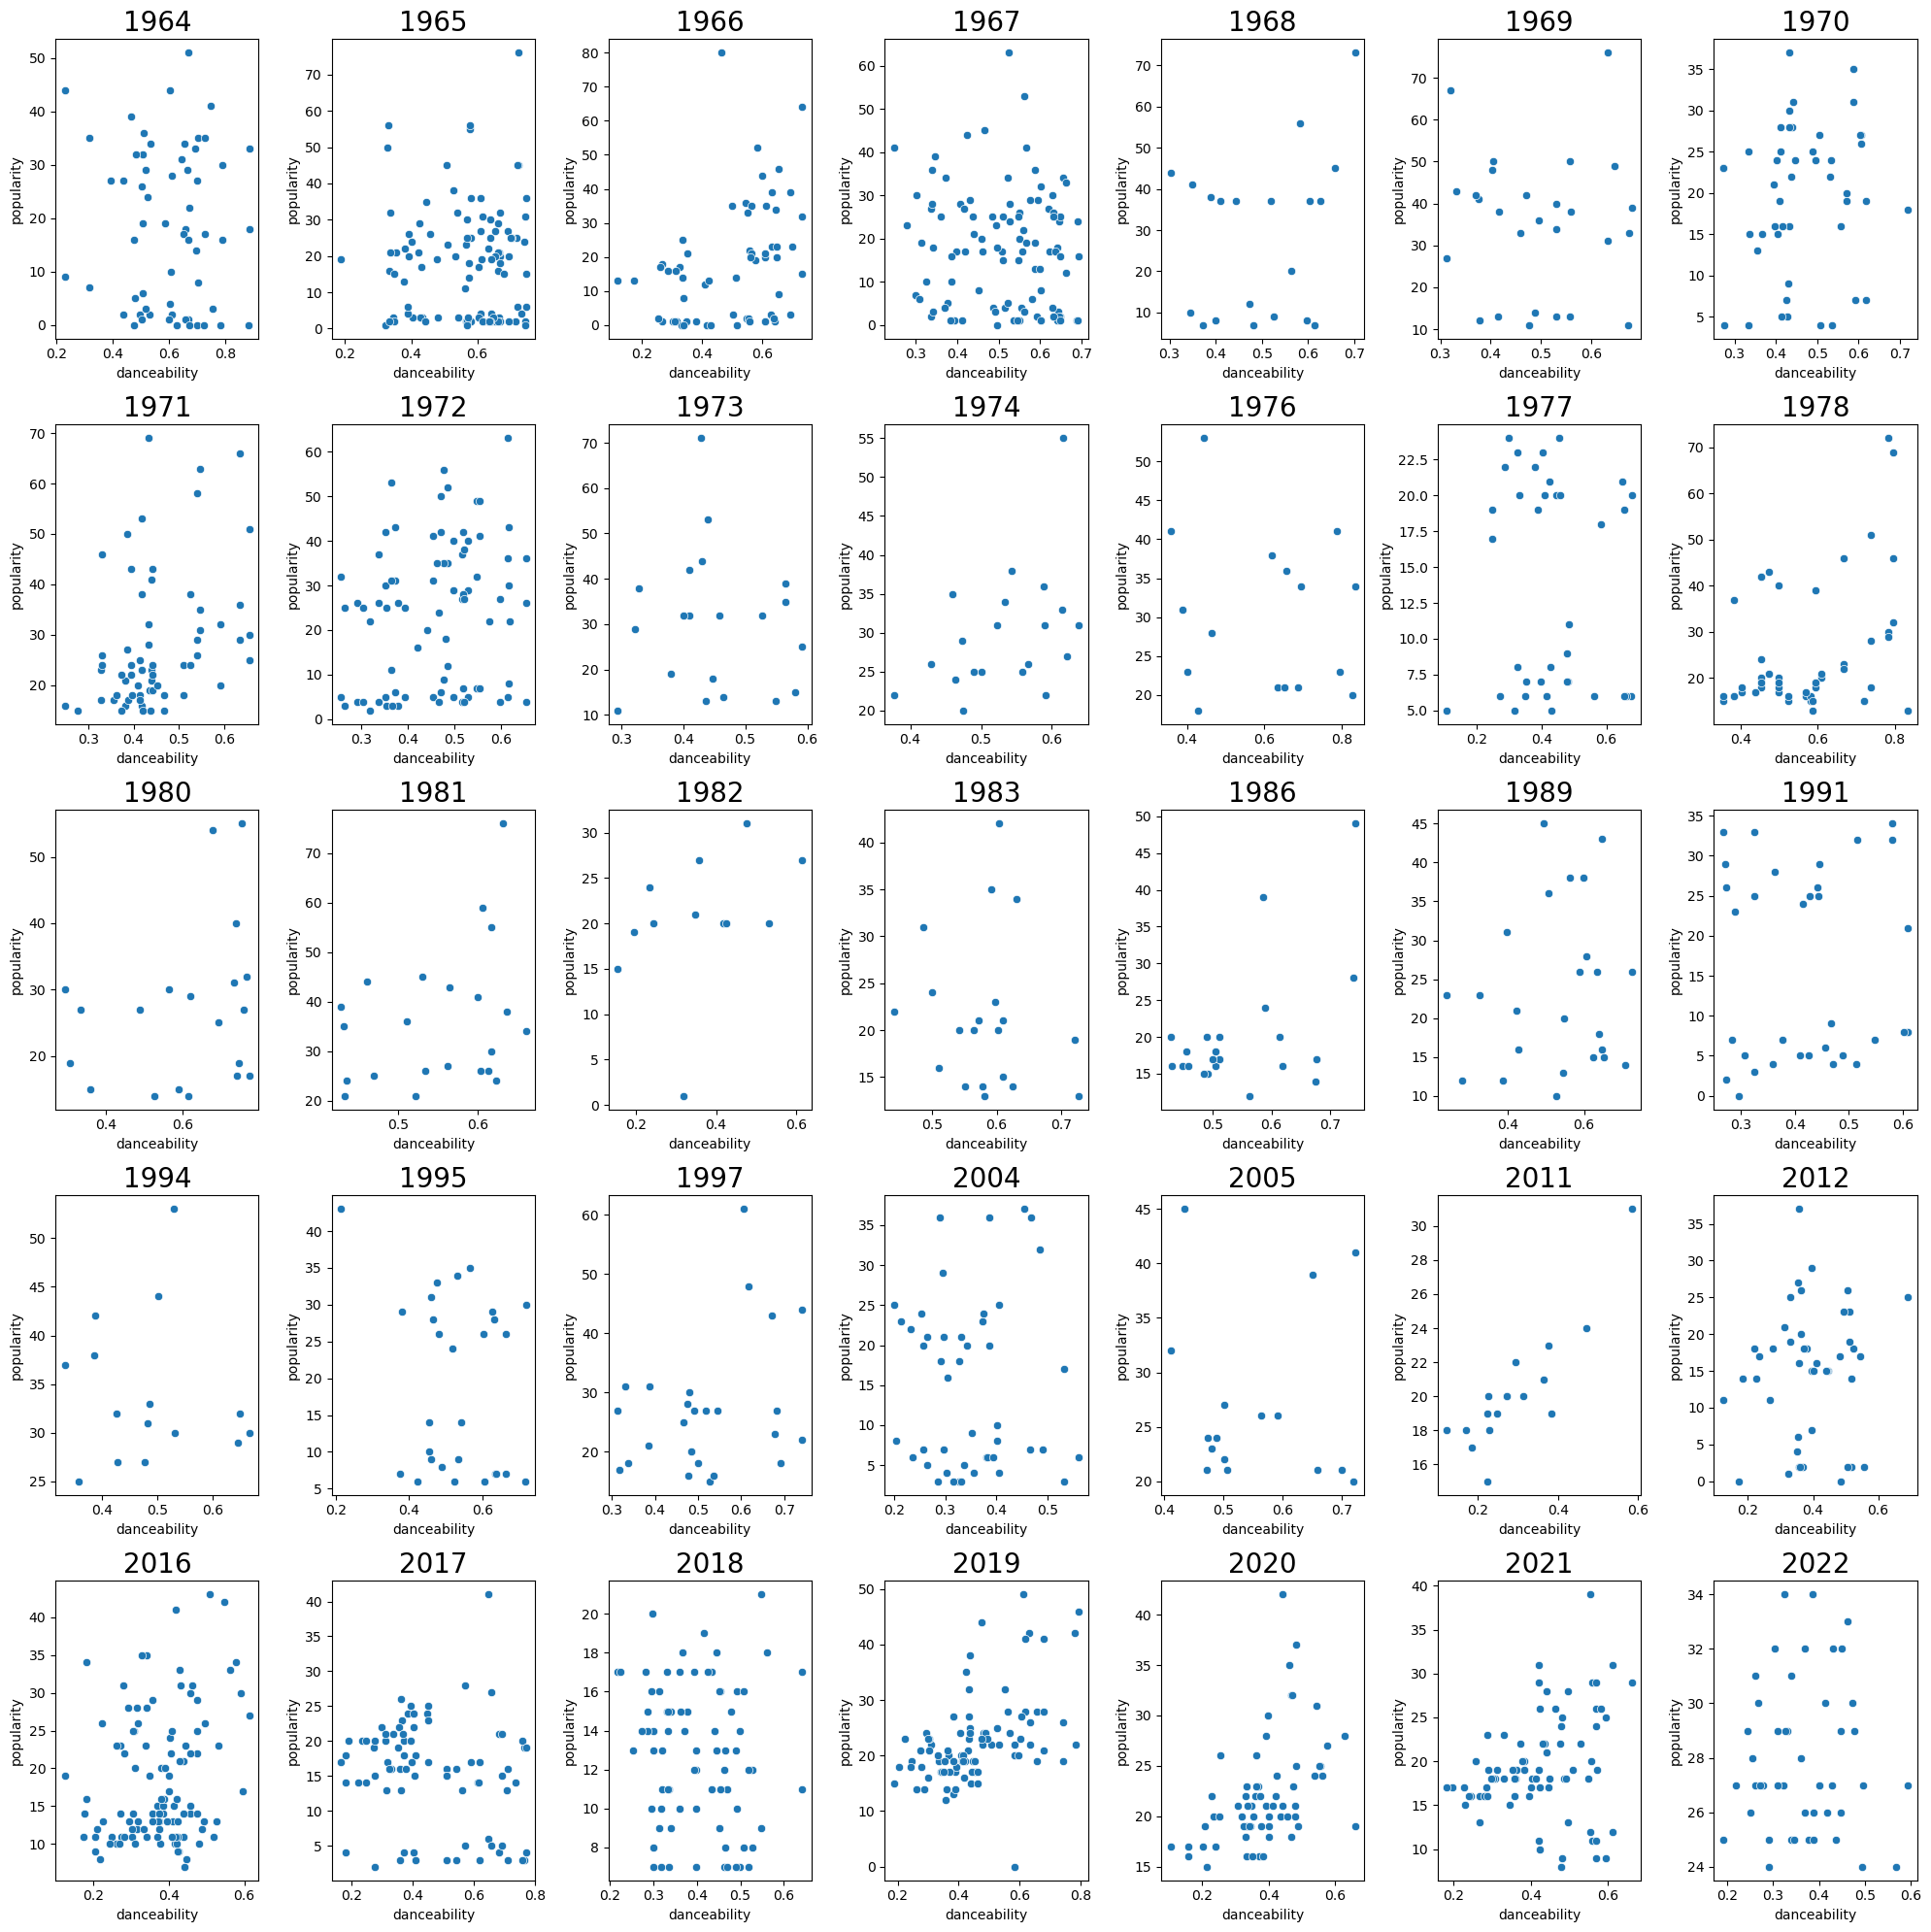

In [24]:
fig,ax=plt.subplots(5,7,figsize=(20,20))
for year,ax in zip(years,ax.flatten()):
    temp_df=df[df['release_date'].dt.year==year]
    sns.scatterplot(data=temp_df,x='danceability',y='popularity',ax=ax)
    ax.set_title(year,fontsize=20)
plt.tight_layout()
plt.show()

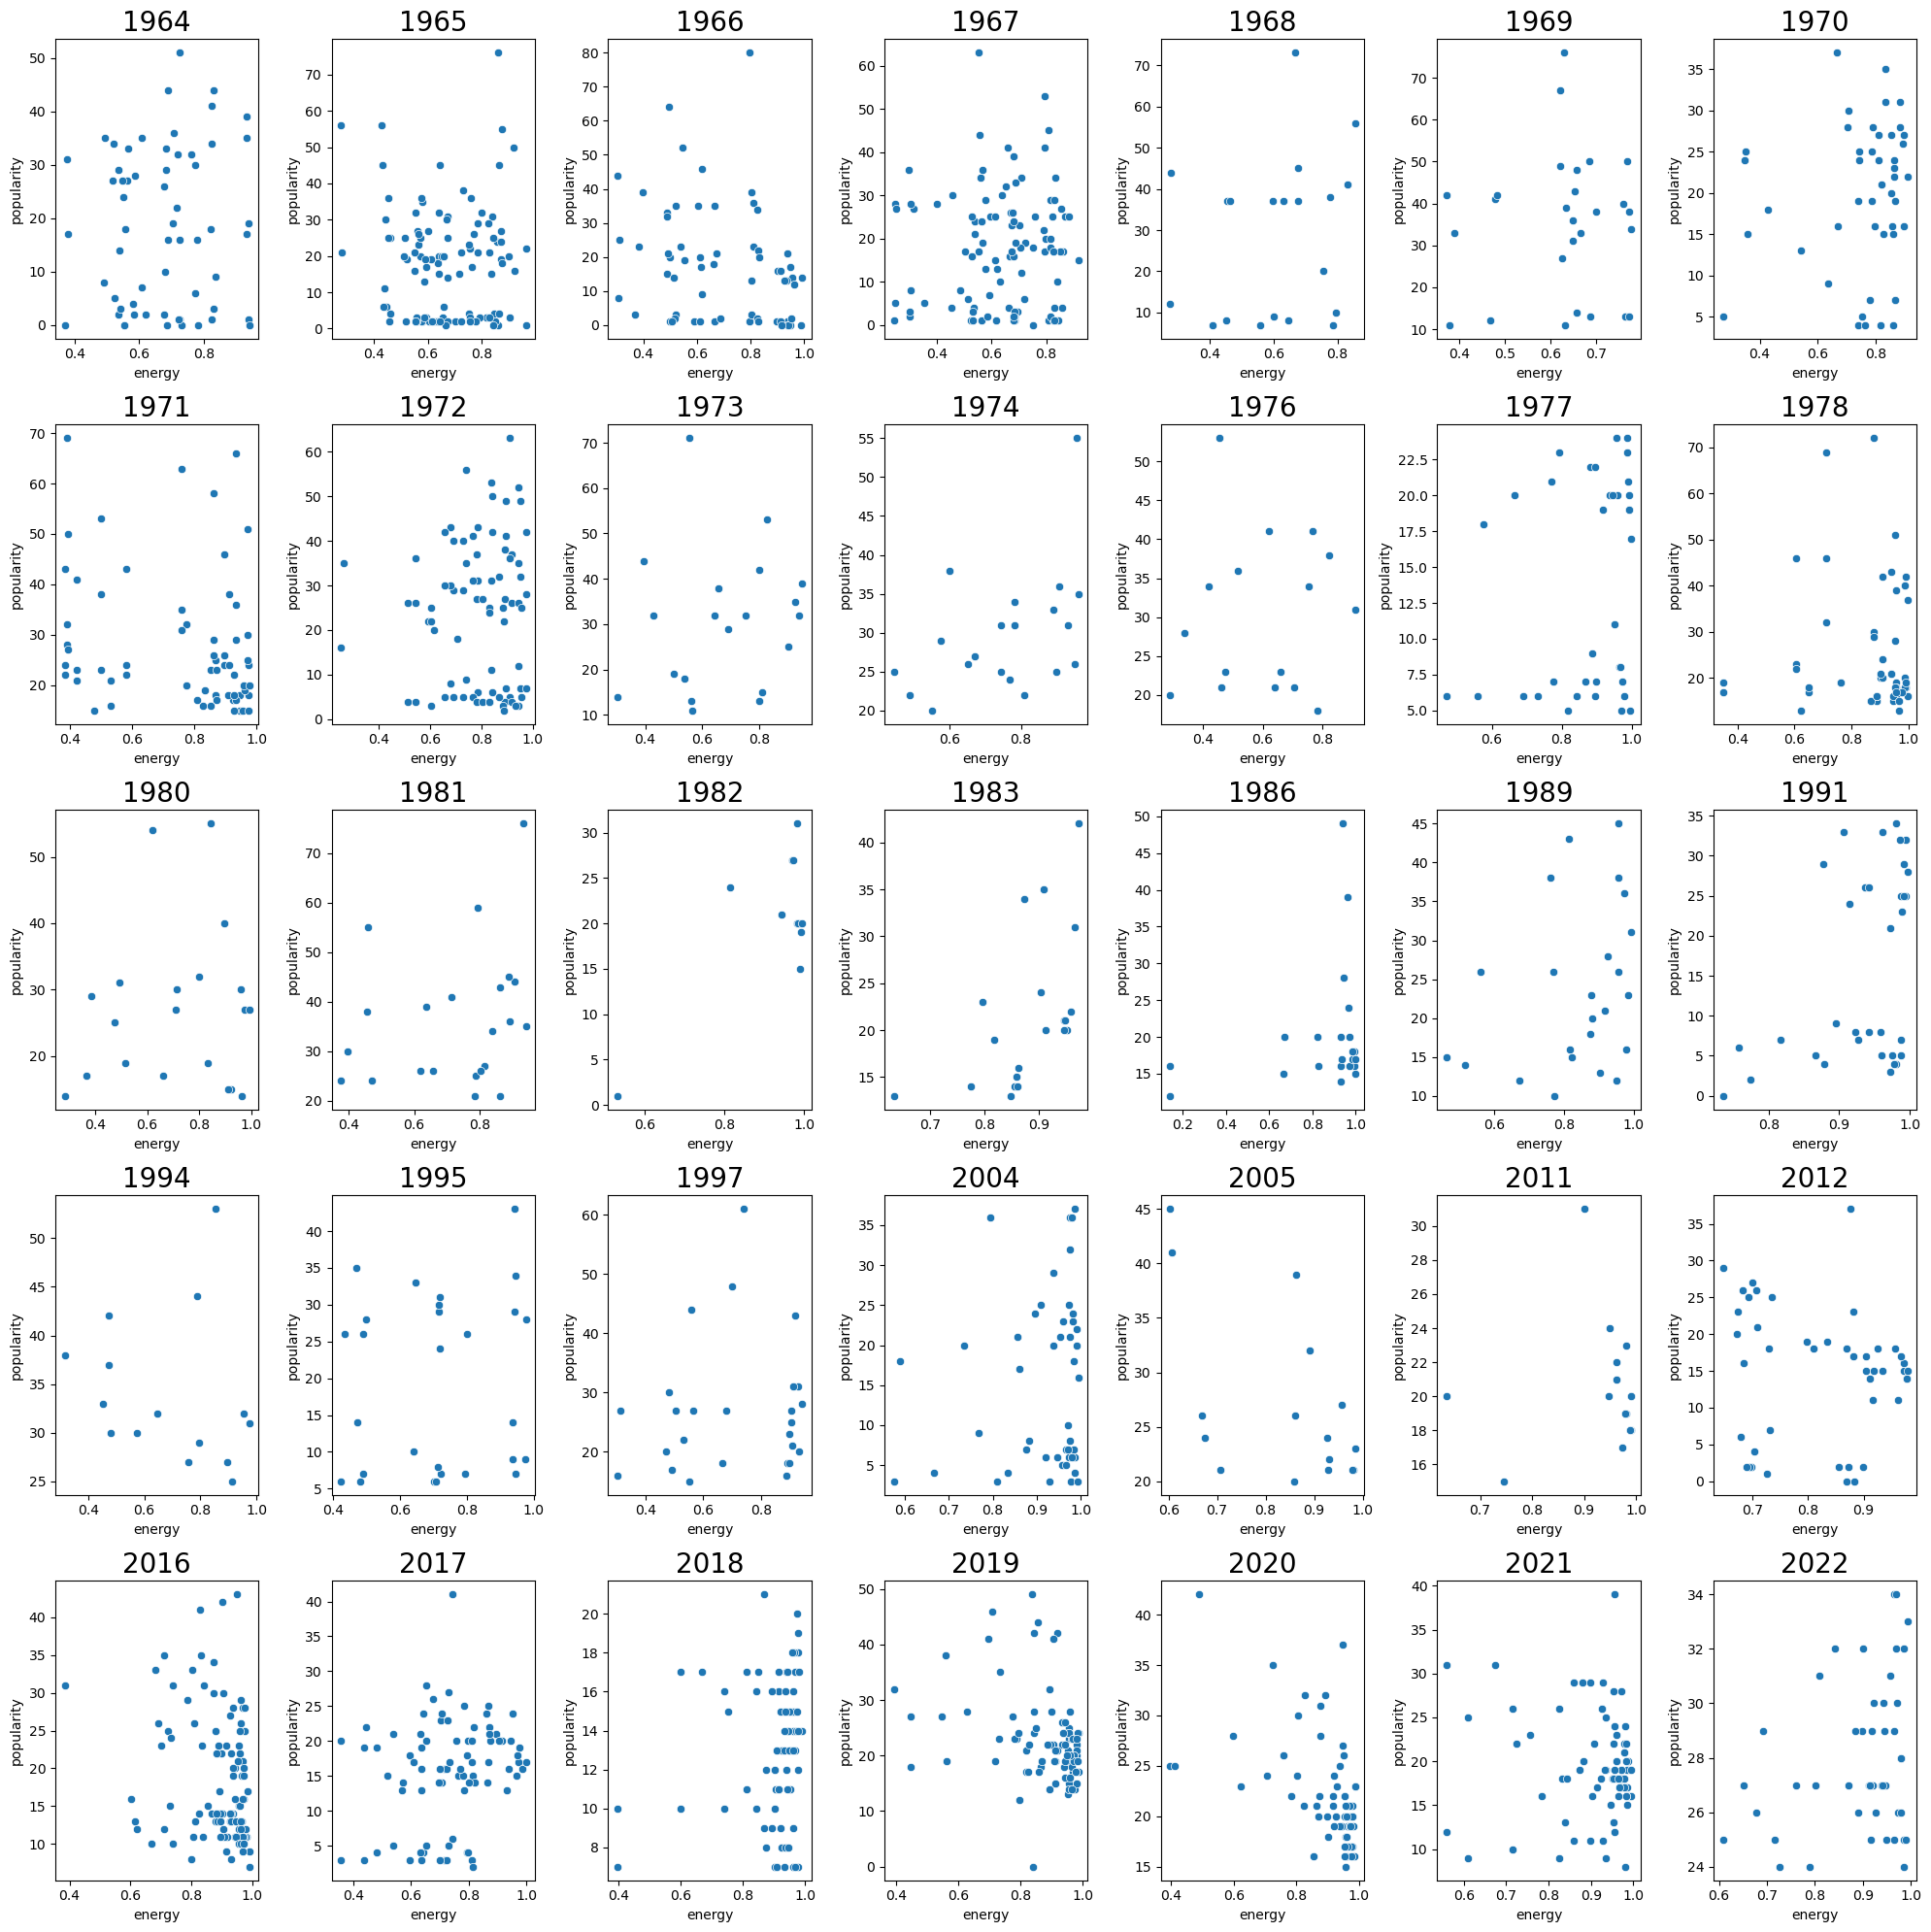

In [25]:
fig,ax=plt.subplots(5,7,figsize=(20,20))
for year,ax in zip(years,ax.flatten()):
    temp_df=df[df['release_date'].dt.year==year]
    sns.scatterplot(data=temp_df,x='energy',y='popularity',ax=ax)
    ax.set_title(year,fontsize=20)
plt.tight_layout()
plt.show()

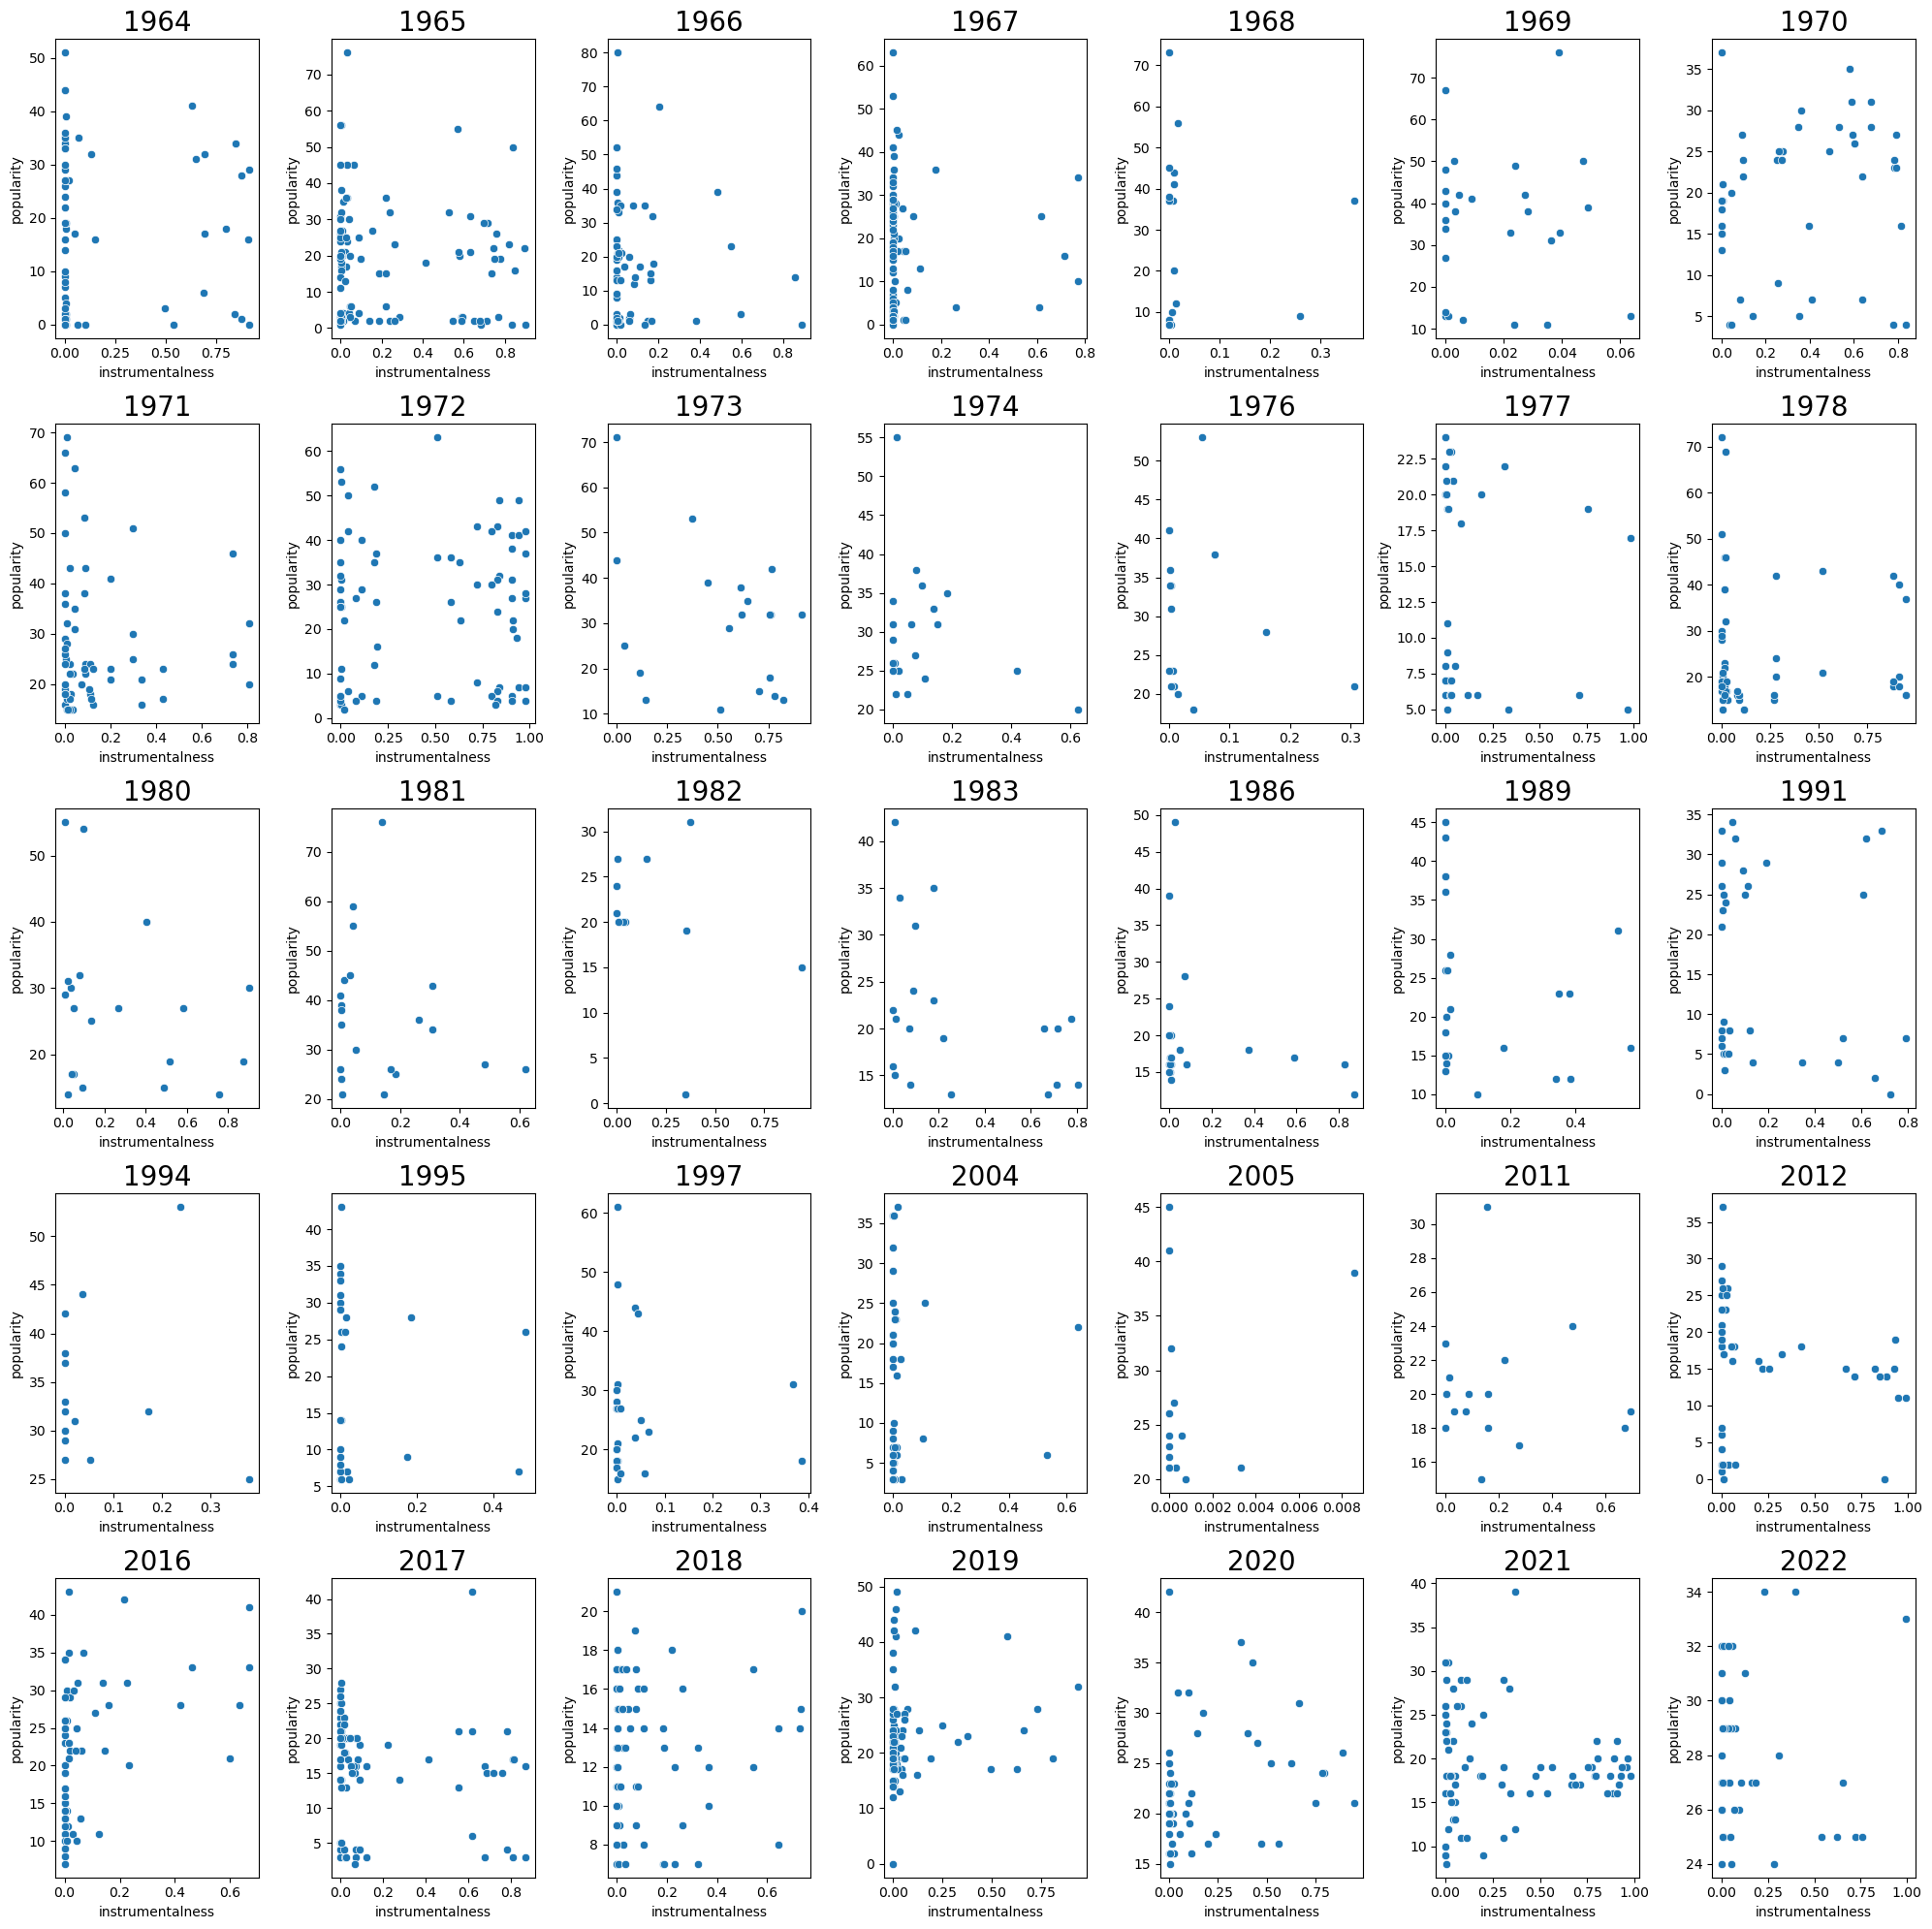

In [26]:
fig,ax=plt.subplots(5,7,figsize=(20,20))
for year,ax in zip(years,ax.flatten()):
    temp_df=df[df['release_date'].dt.year==year]
    sns.scatterplot(data=temp_df,x='instrumentalness',y='popularity',ax=ax)
    ax.set_title(year,fontsize=20)
plt.tight_layout()
plt.show()

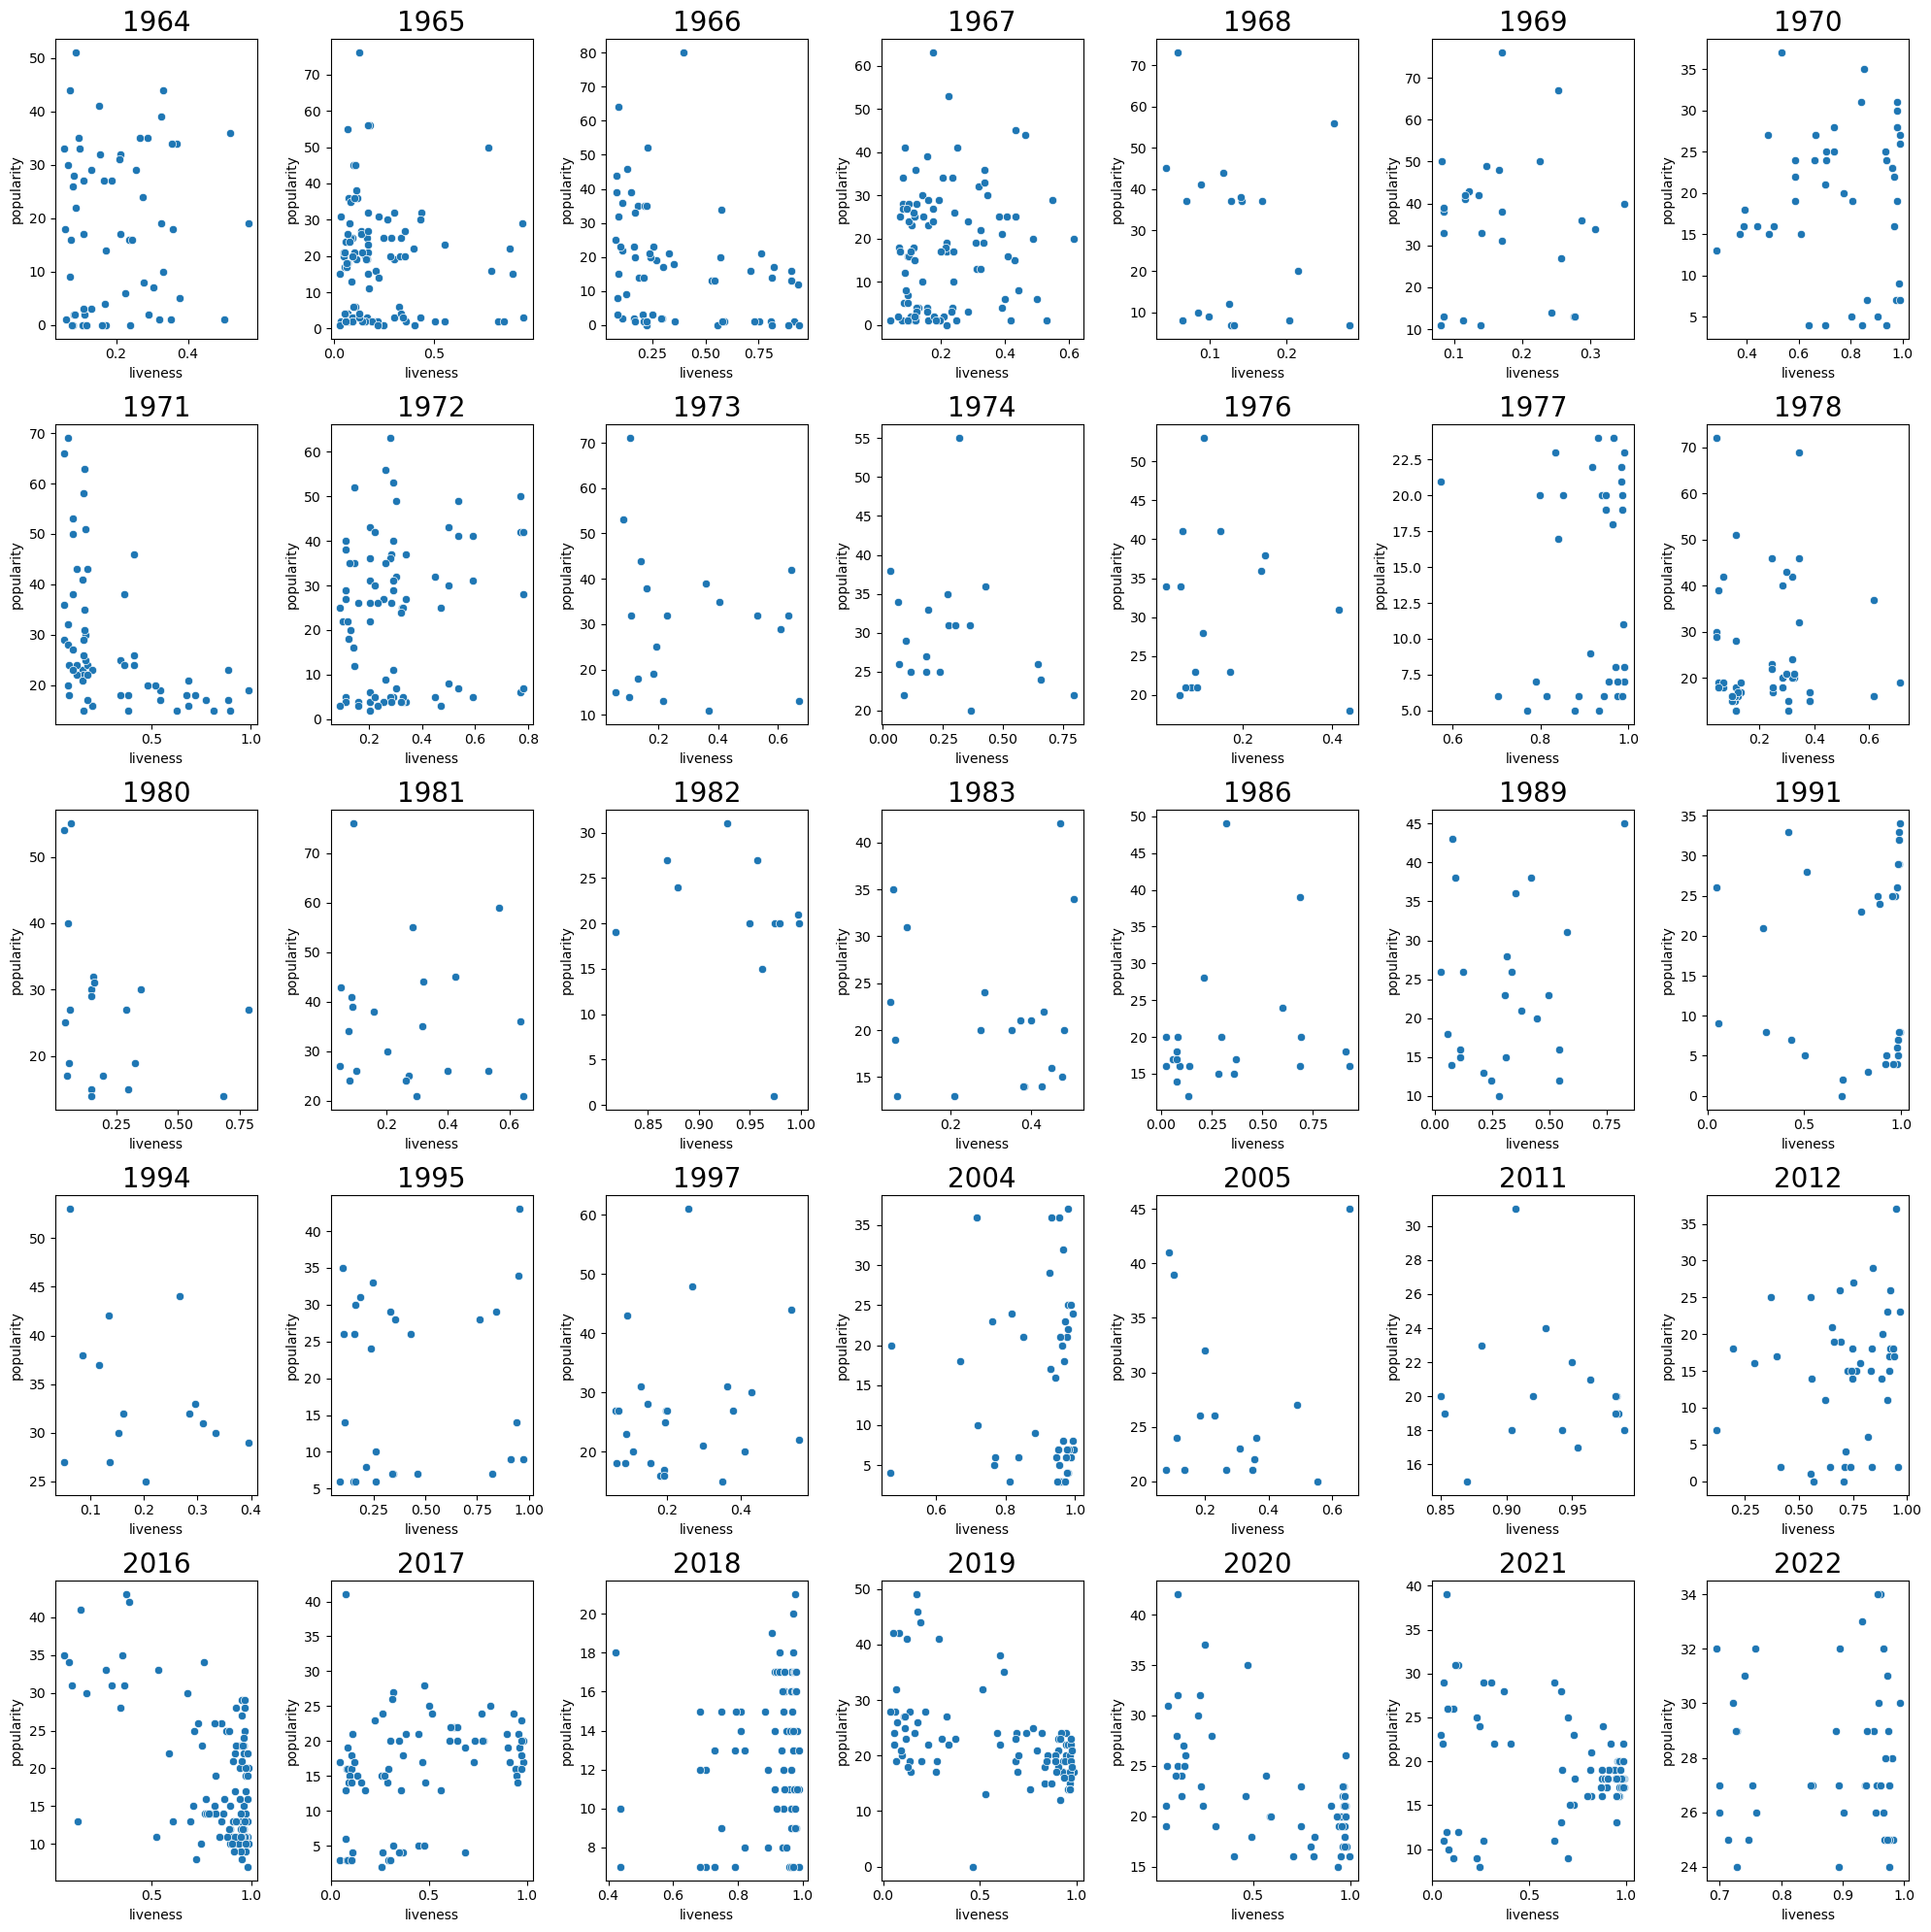

In [27]:
fig,ax=plt.subplots(5,7,figsize=(20,20))
for year,ax in zip(years,ax.flatten()):
    temp_df=df[df['release_date'].dt.year==year]
    sns.scatterplot(data=temp_df,x='liveness',y='popularity',ax=ax)
    ax.set_title(year,fontsize=20)
plt.tight_layout()
plt.show()

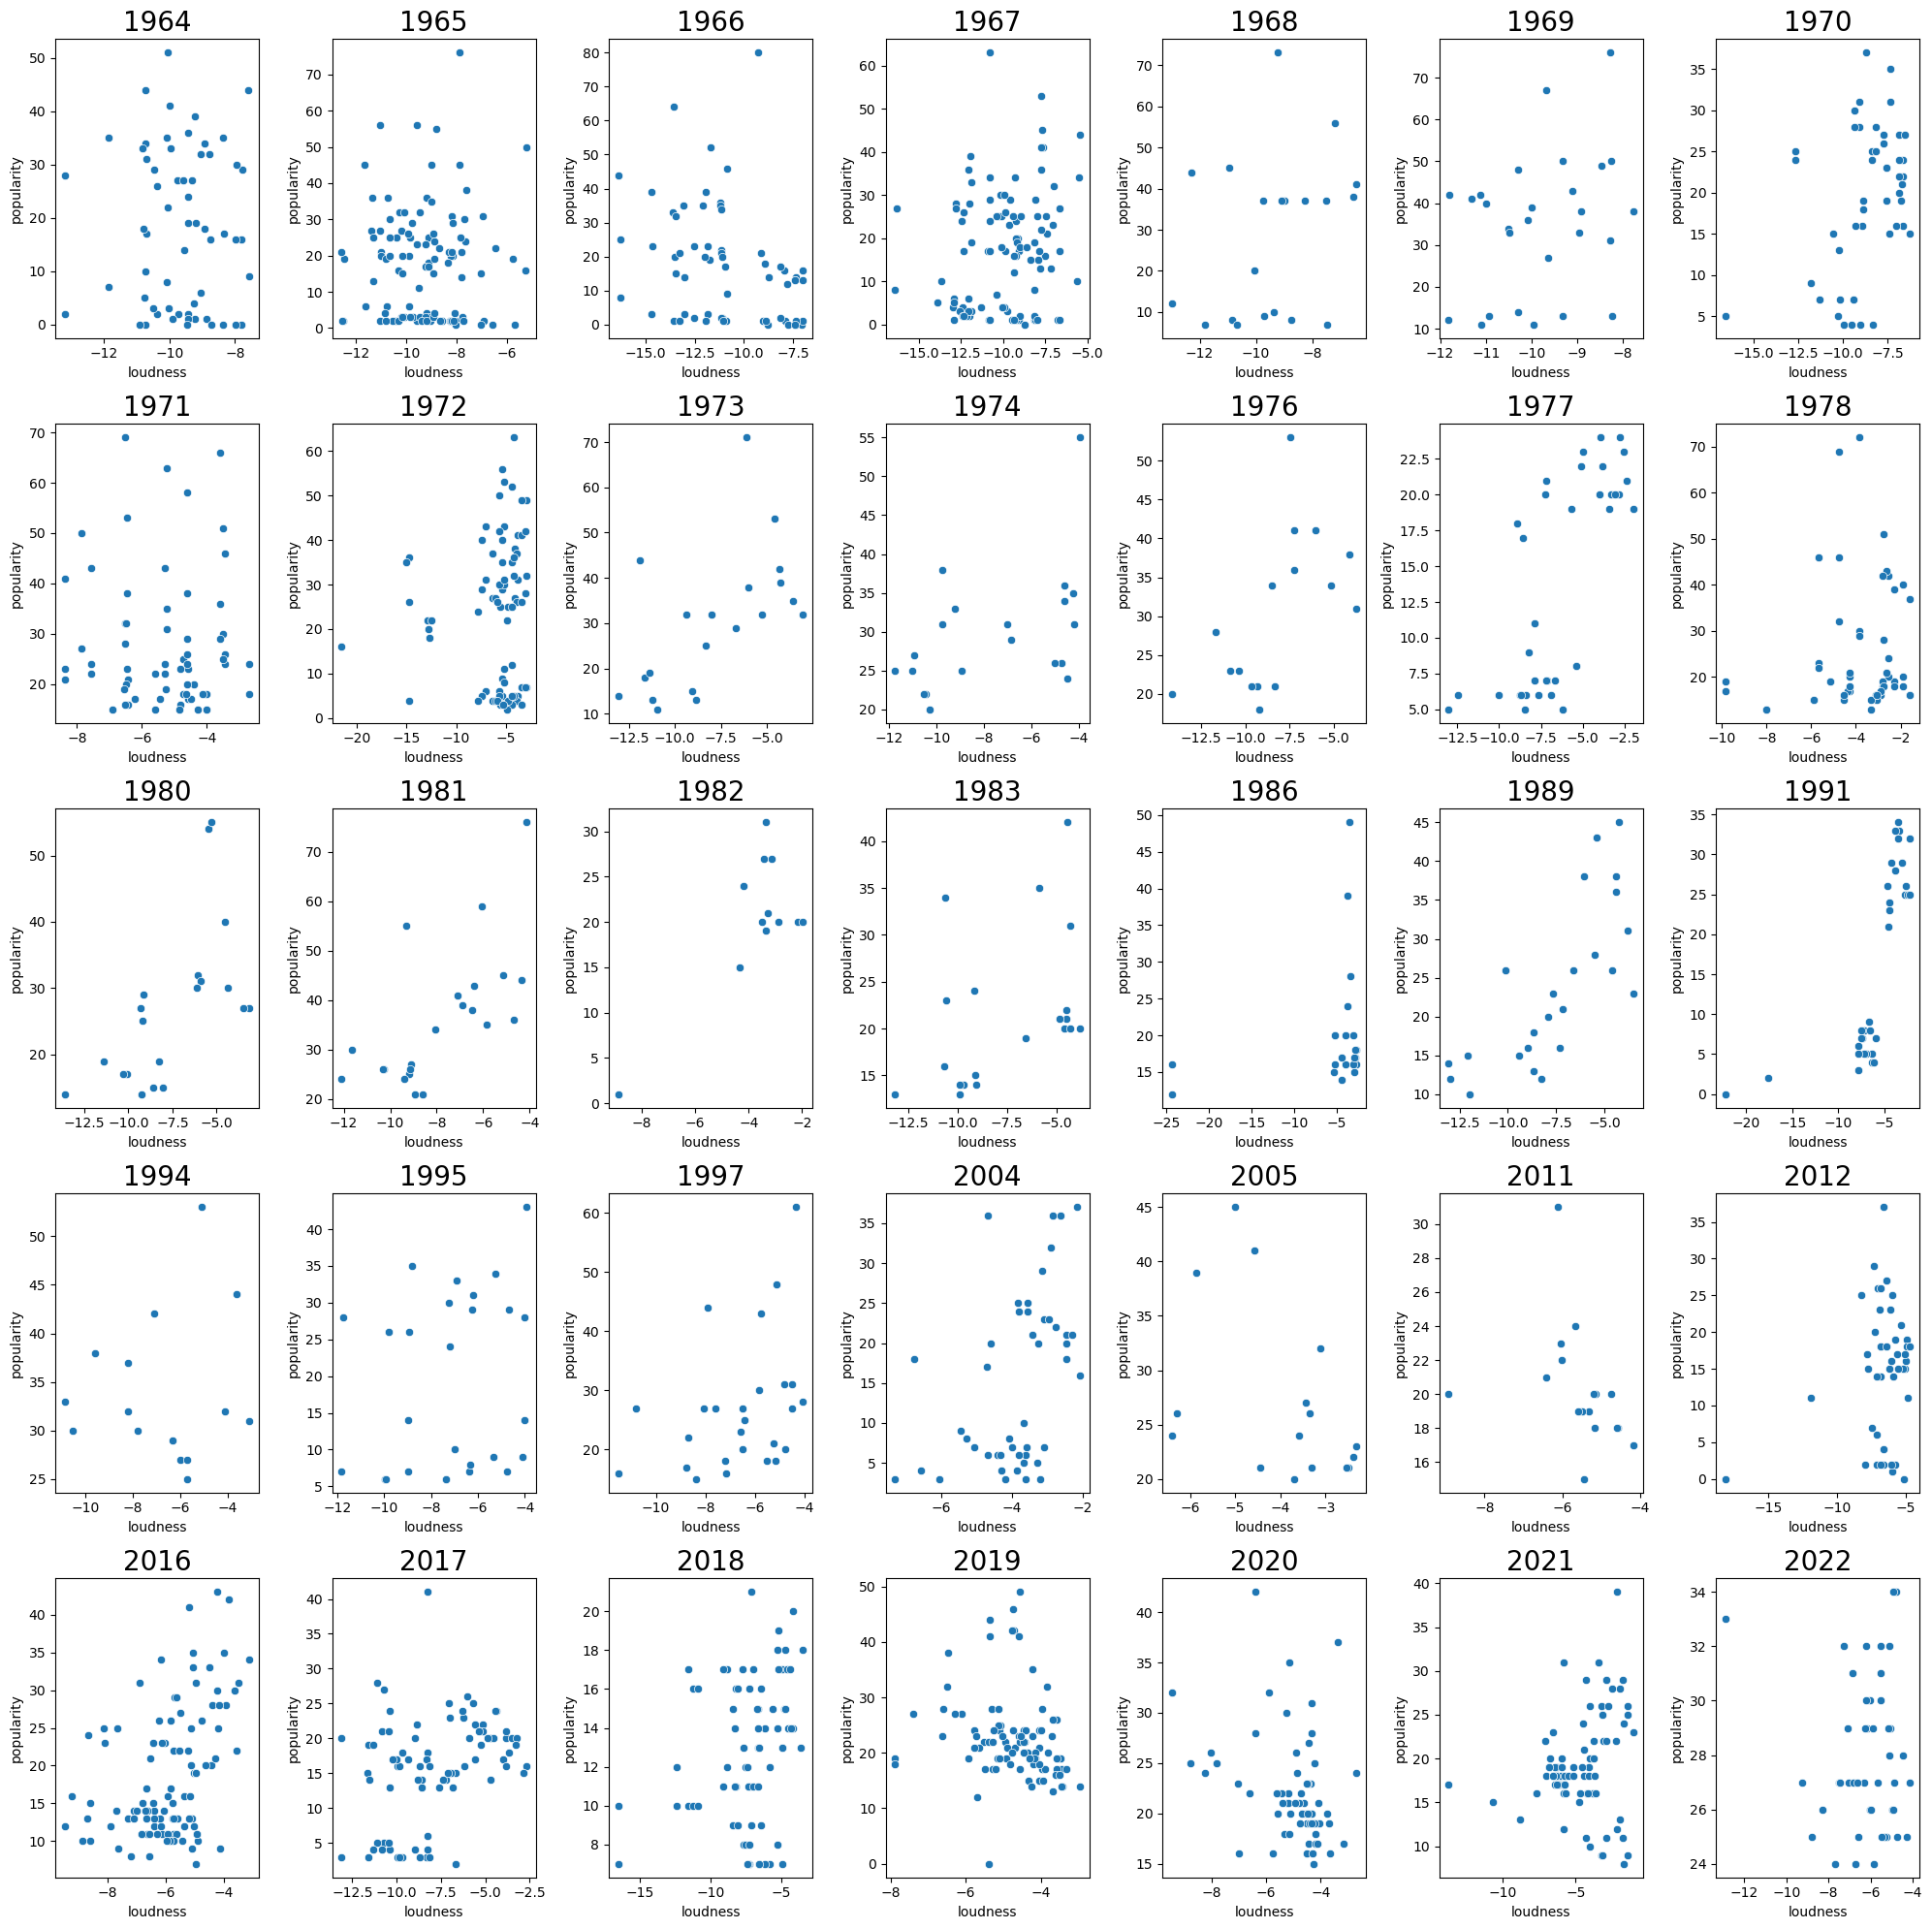

In [28]:
fig,ax=plt.subplots(5,7,figsize=(20,20))
for year,ax in zip(years,ax.flatten()):
    temp_df=df[df['release_date'].dt.year==year]
    sns.scatterplot(data=temp_df,x='loudness',y='popularity',ax=ax)
    ax.set_title(year,fontsize=20)
plt.tight_layout()
plt.show()

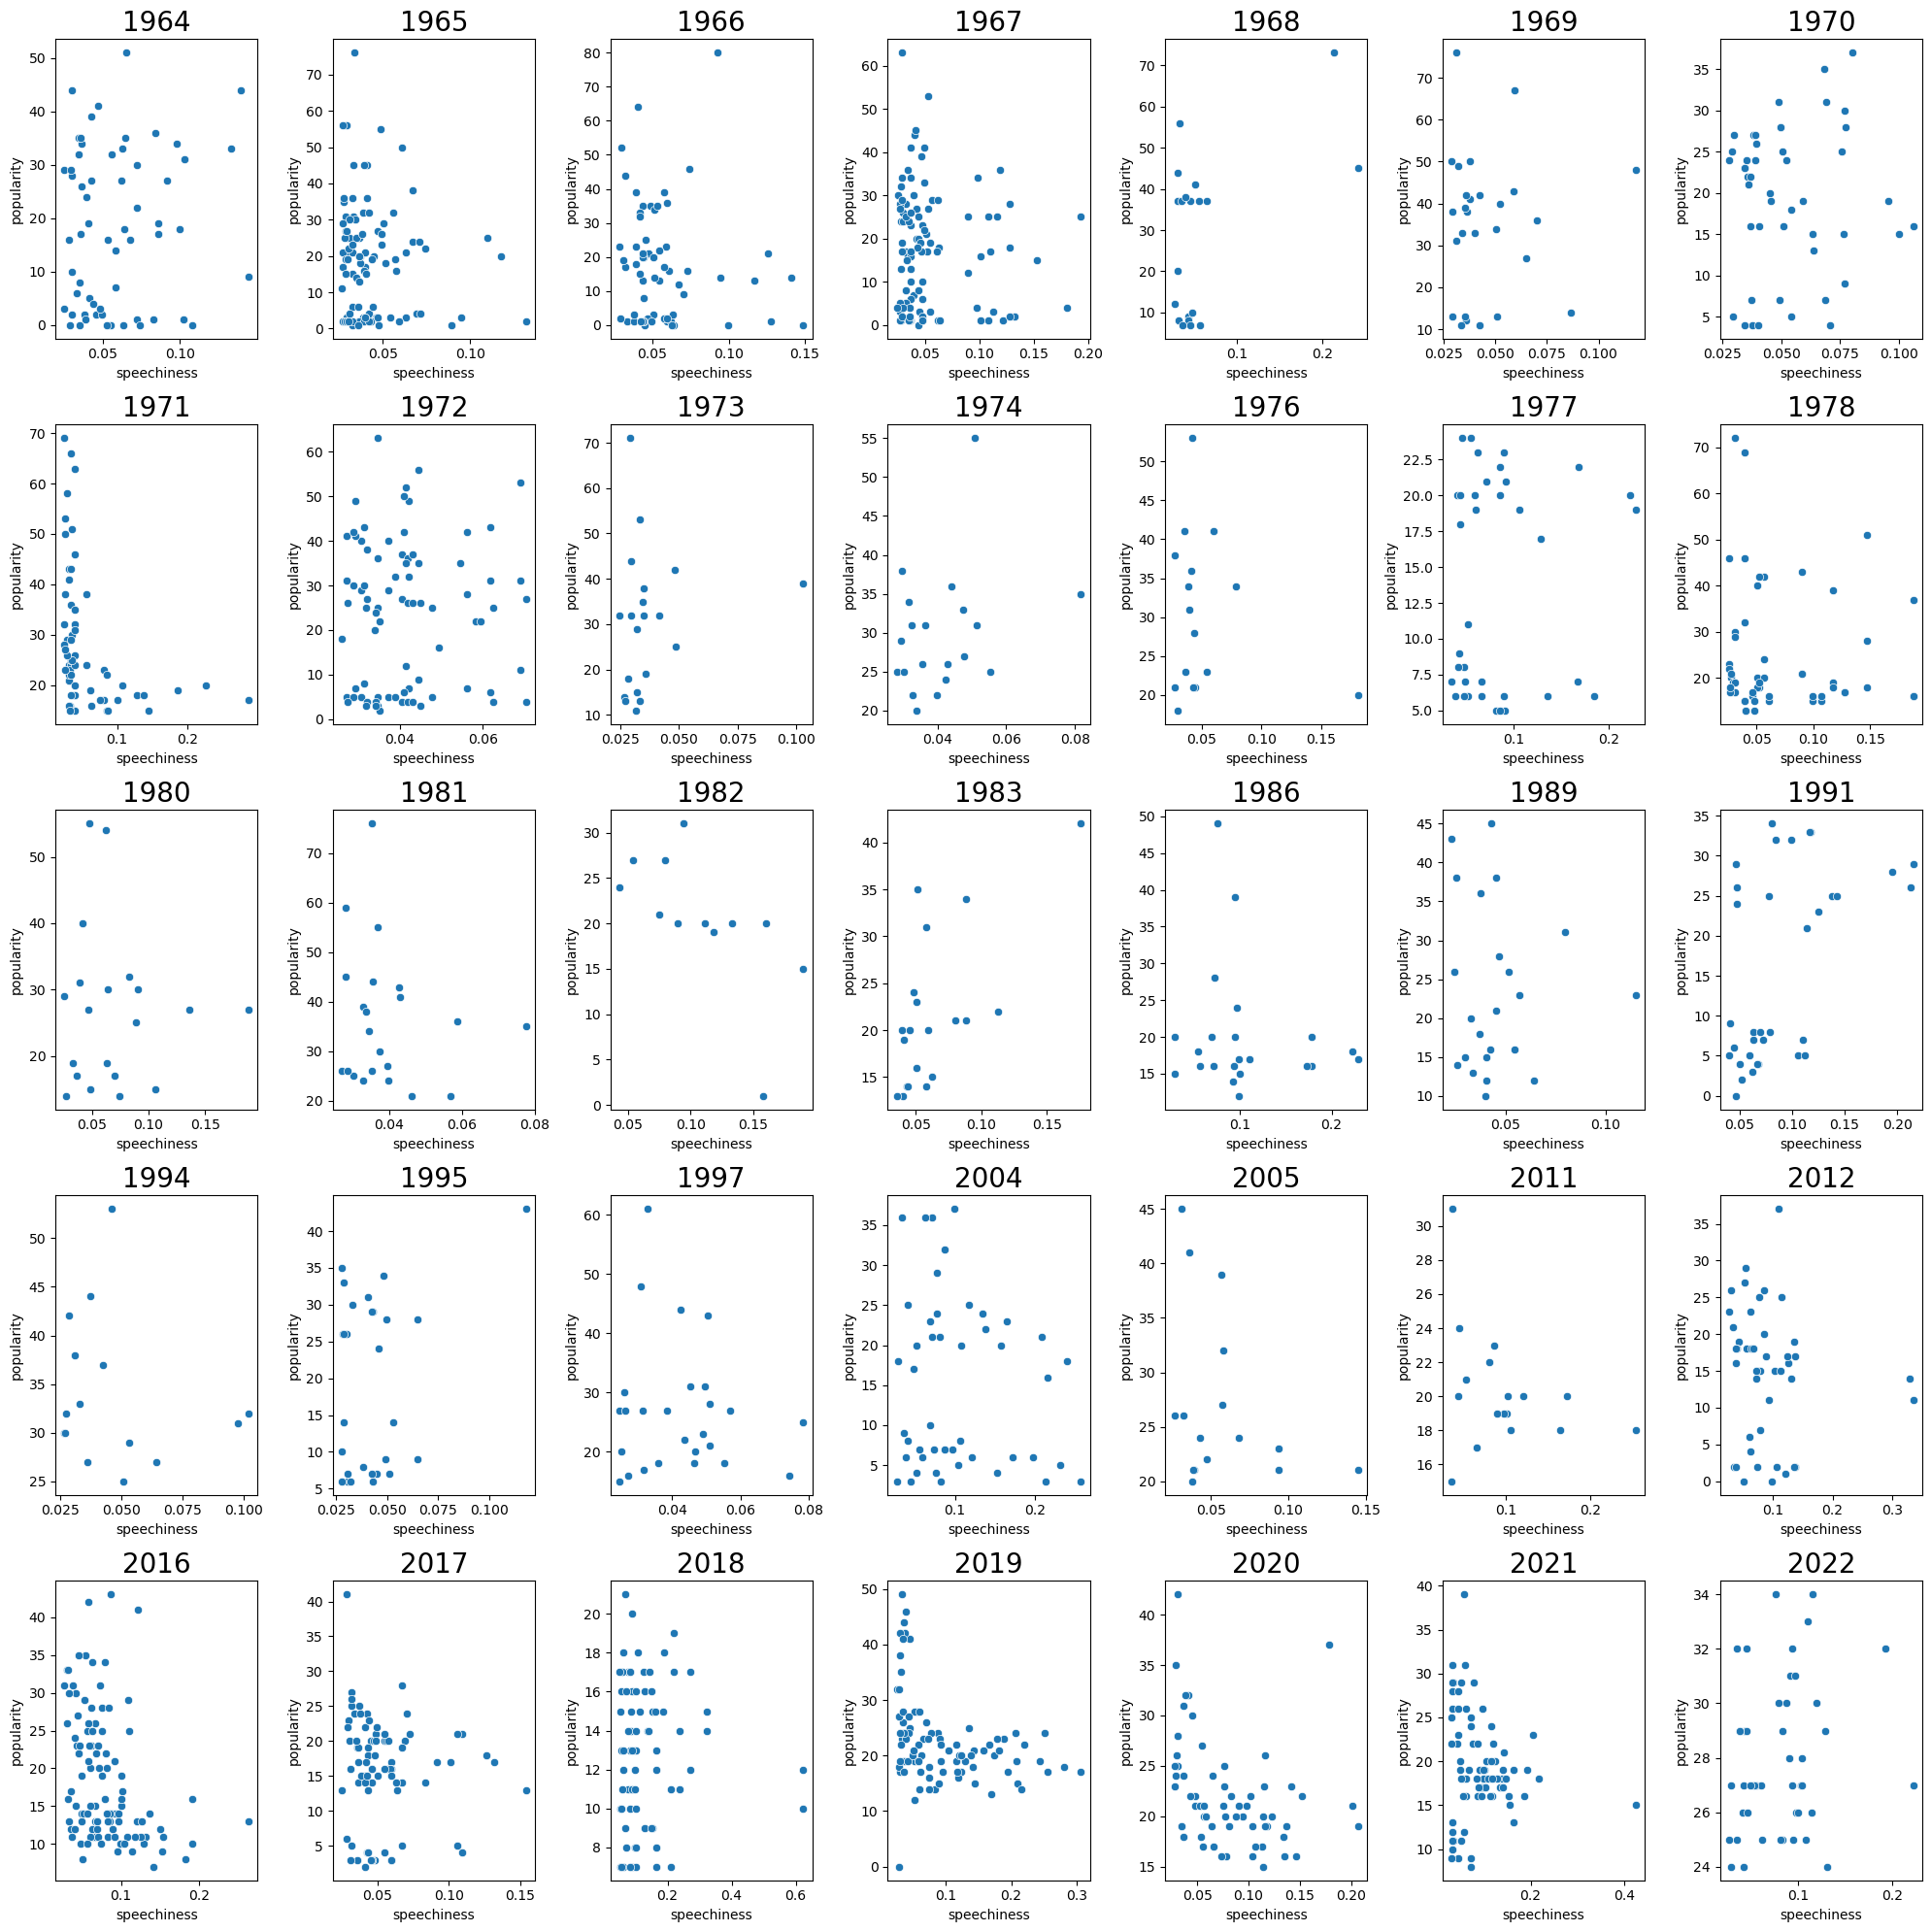

In [29]:
fig,ax=plt.subplots(5,7,figsize=(20,20))
for year,ax in zip(years,ax.flatten()):
    temp_df=df[df['release_date'].dt.year==year]
    sns.scatterplot(data=temp_df,x='speechiness',y='popularity',ax=ax)
    ax.set_title(year,fontsize=20)
plt.tight_layout()
plt.show()

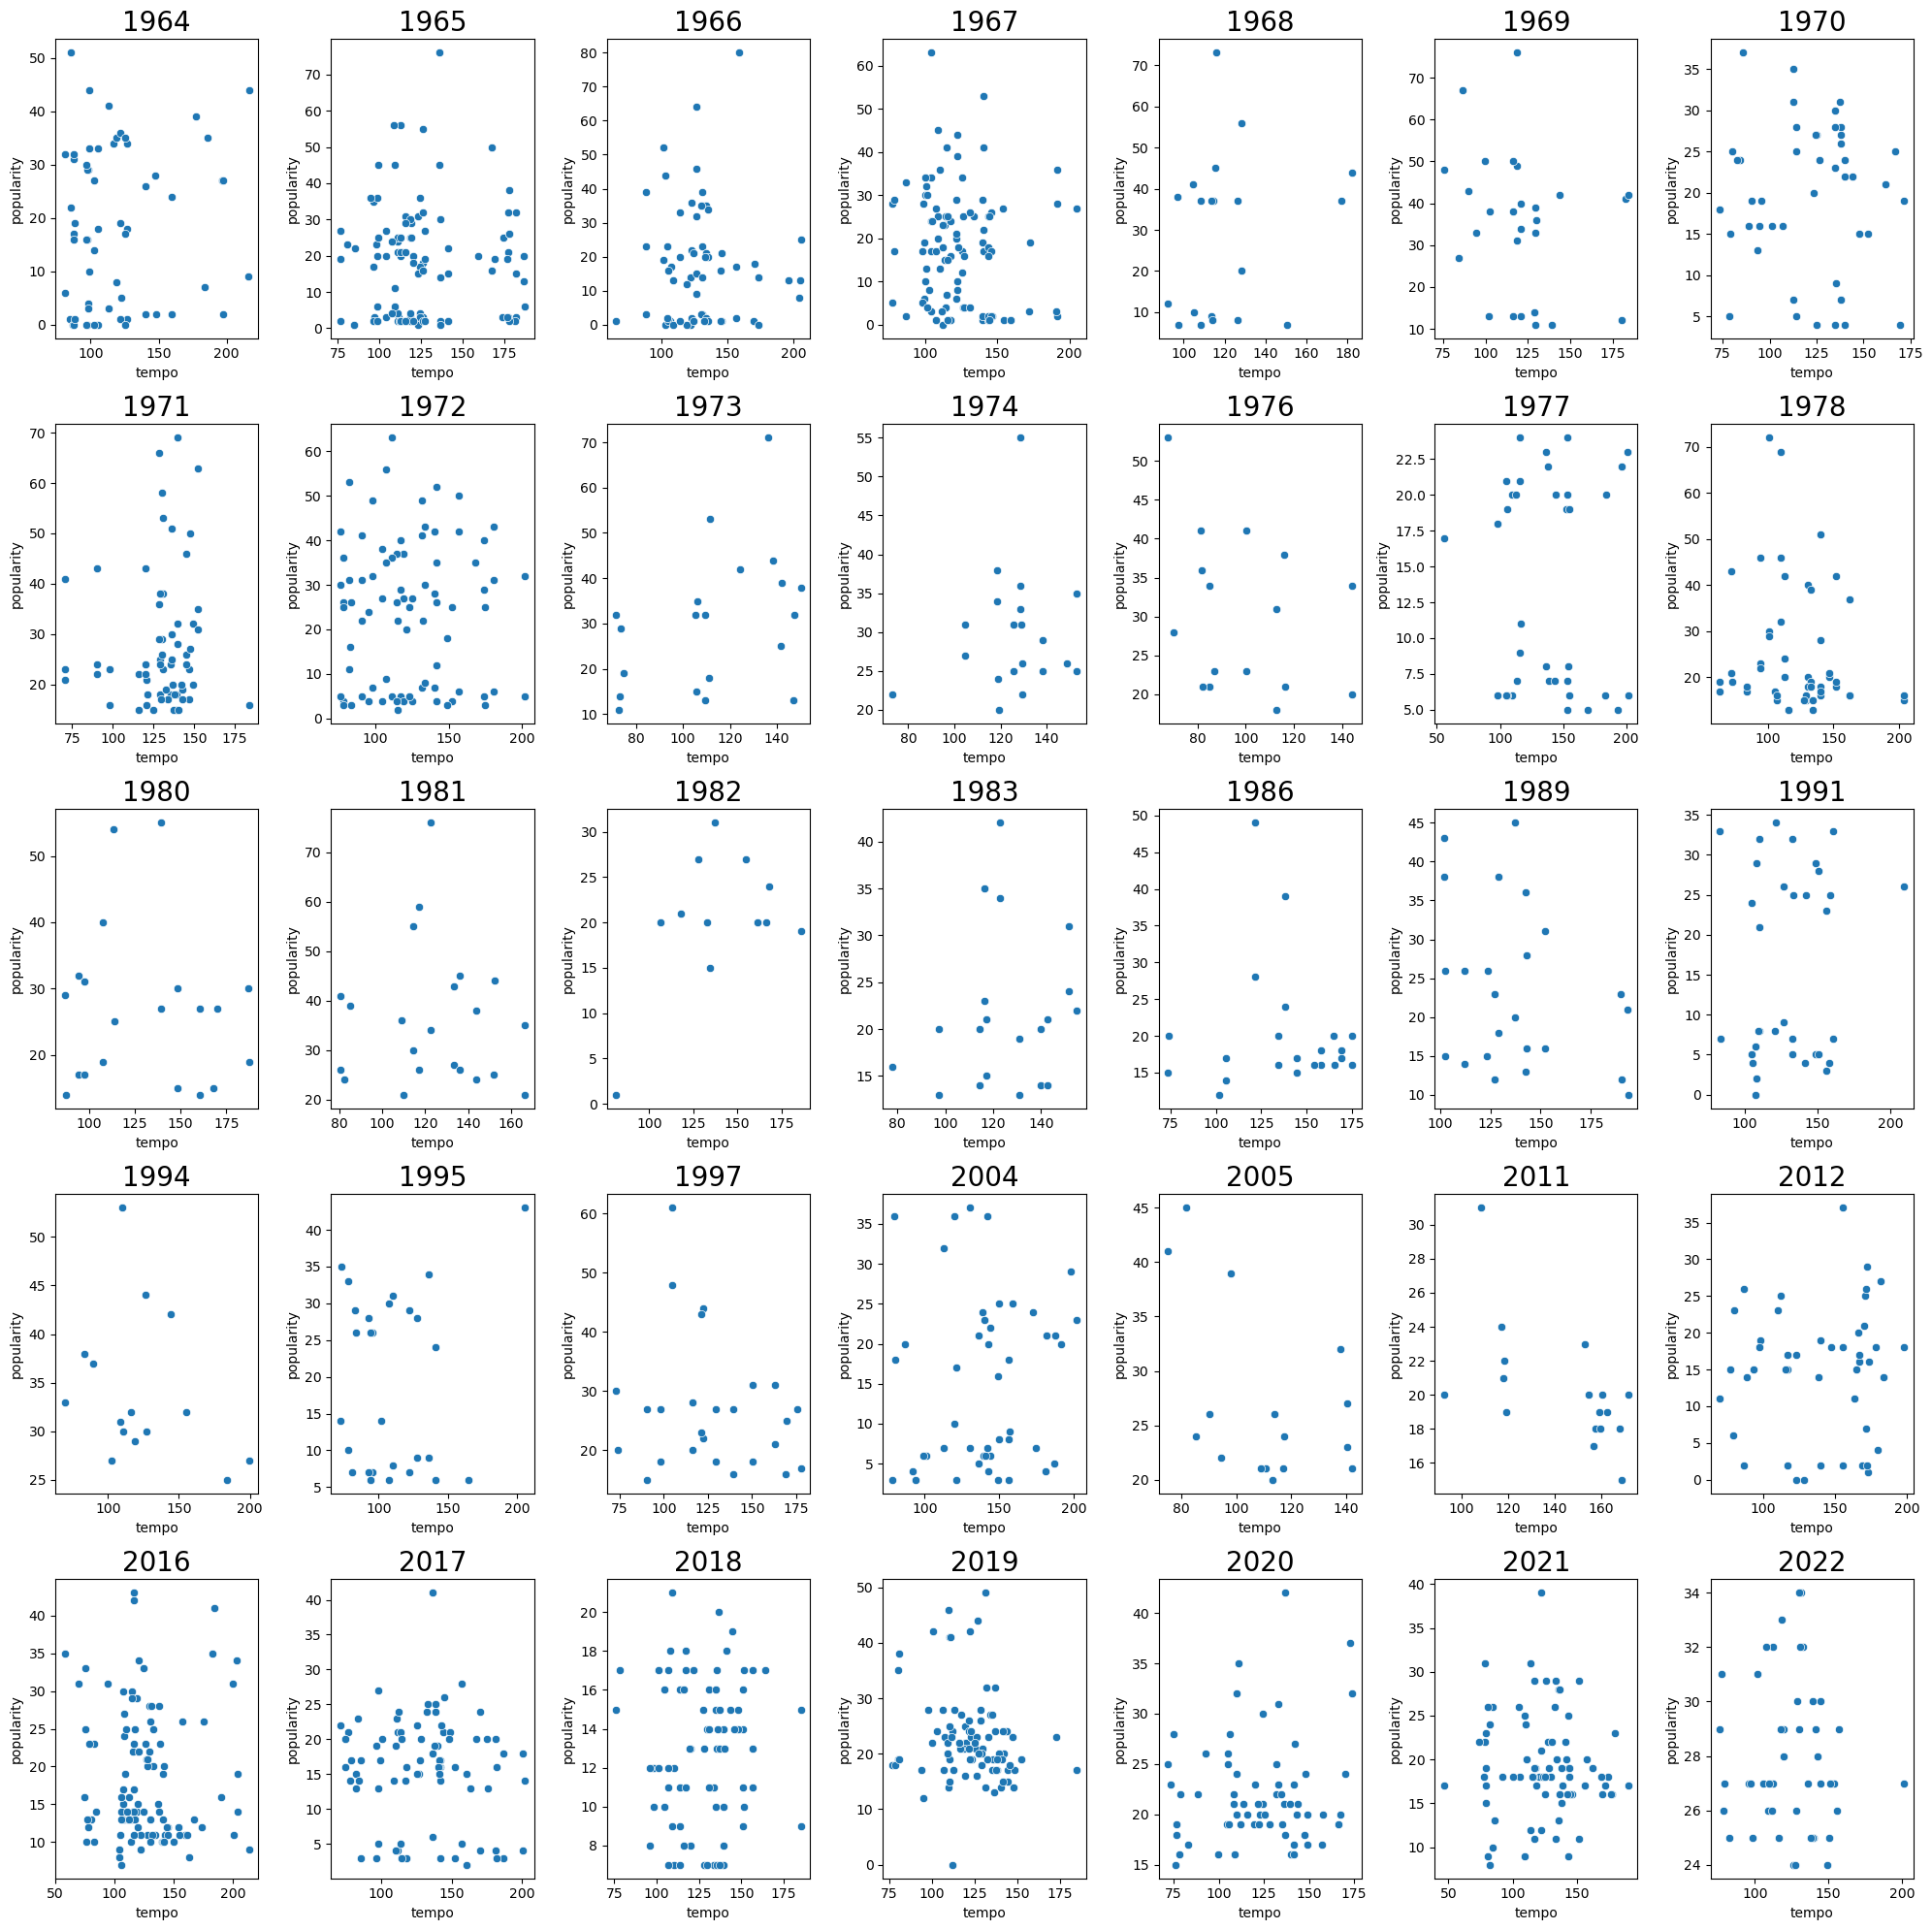

In [30]:
fig,ax=plt.subplots(5,7,figsize=(20,20))
for year,ax in zip(years,ax.flatten()):
    temp_df=df[df['release_date'].dt.year==year]
    sns.scatterplot(data=temp_df,x='tempo',y='popularity',ax=ax)
    ax.set_title(year,fontsize=20)
plt.tight_layout()
plt.show()

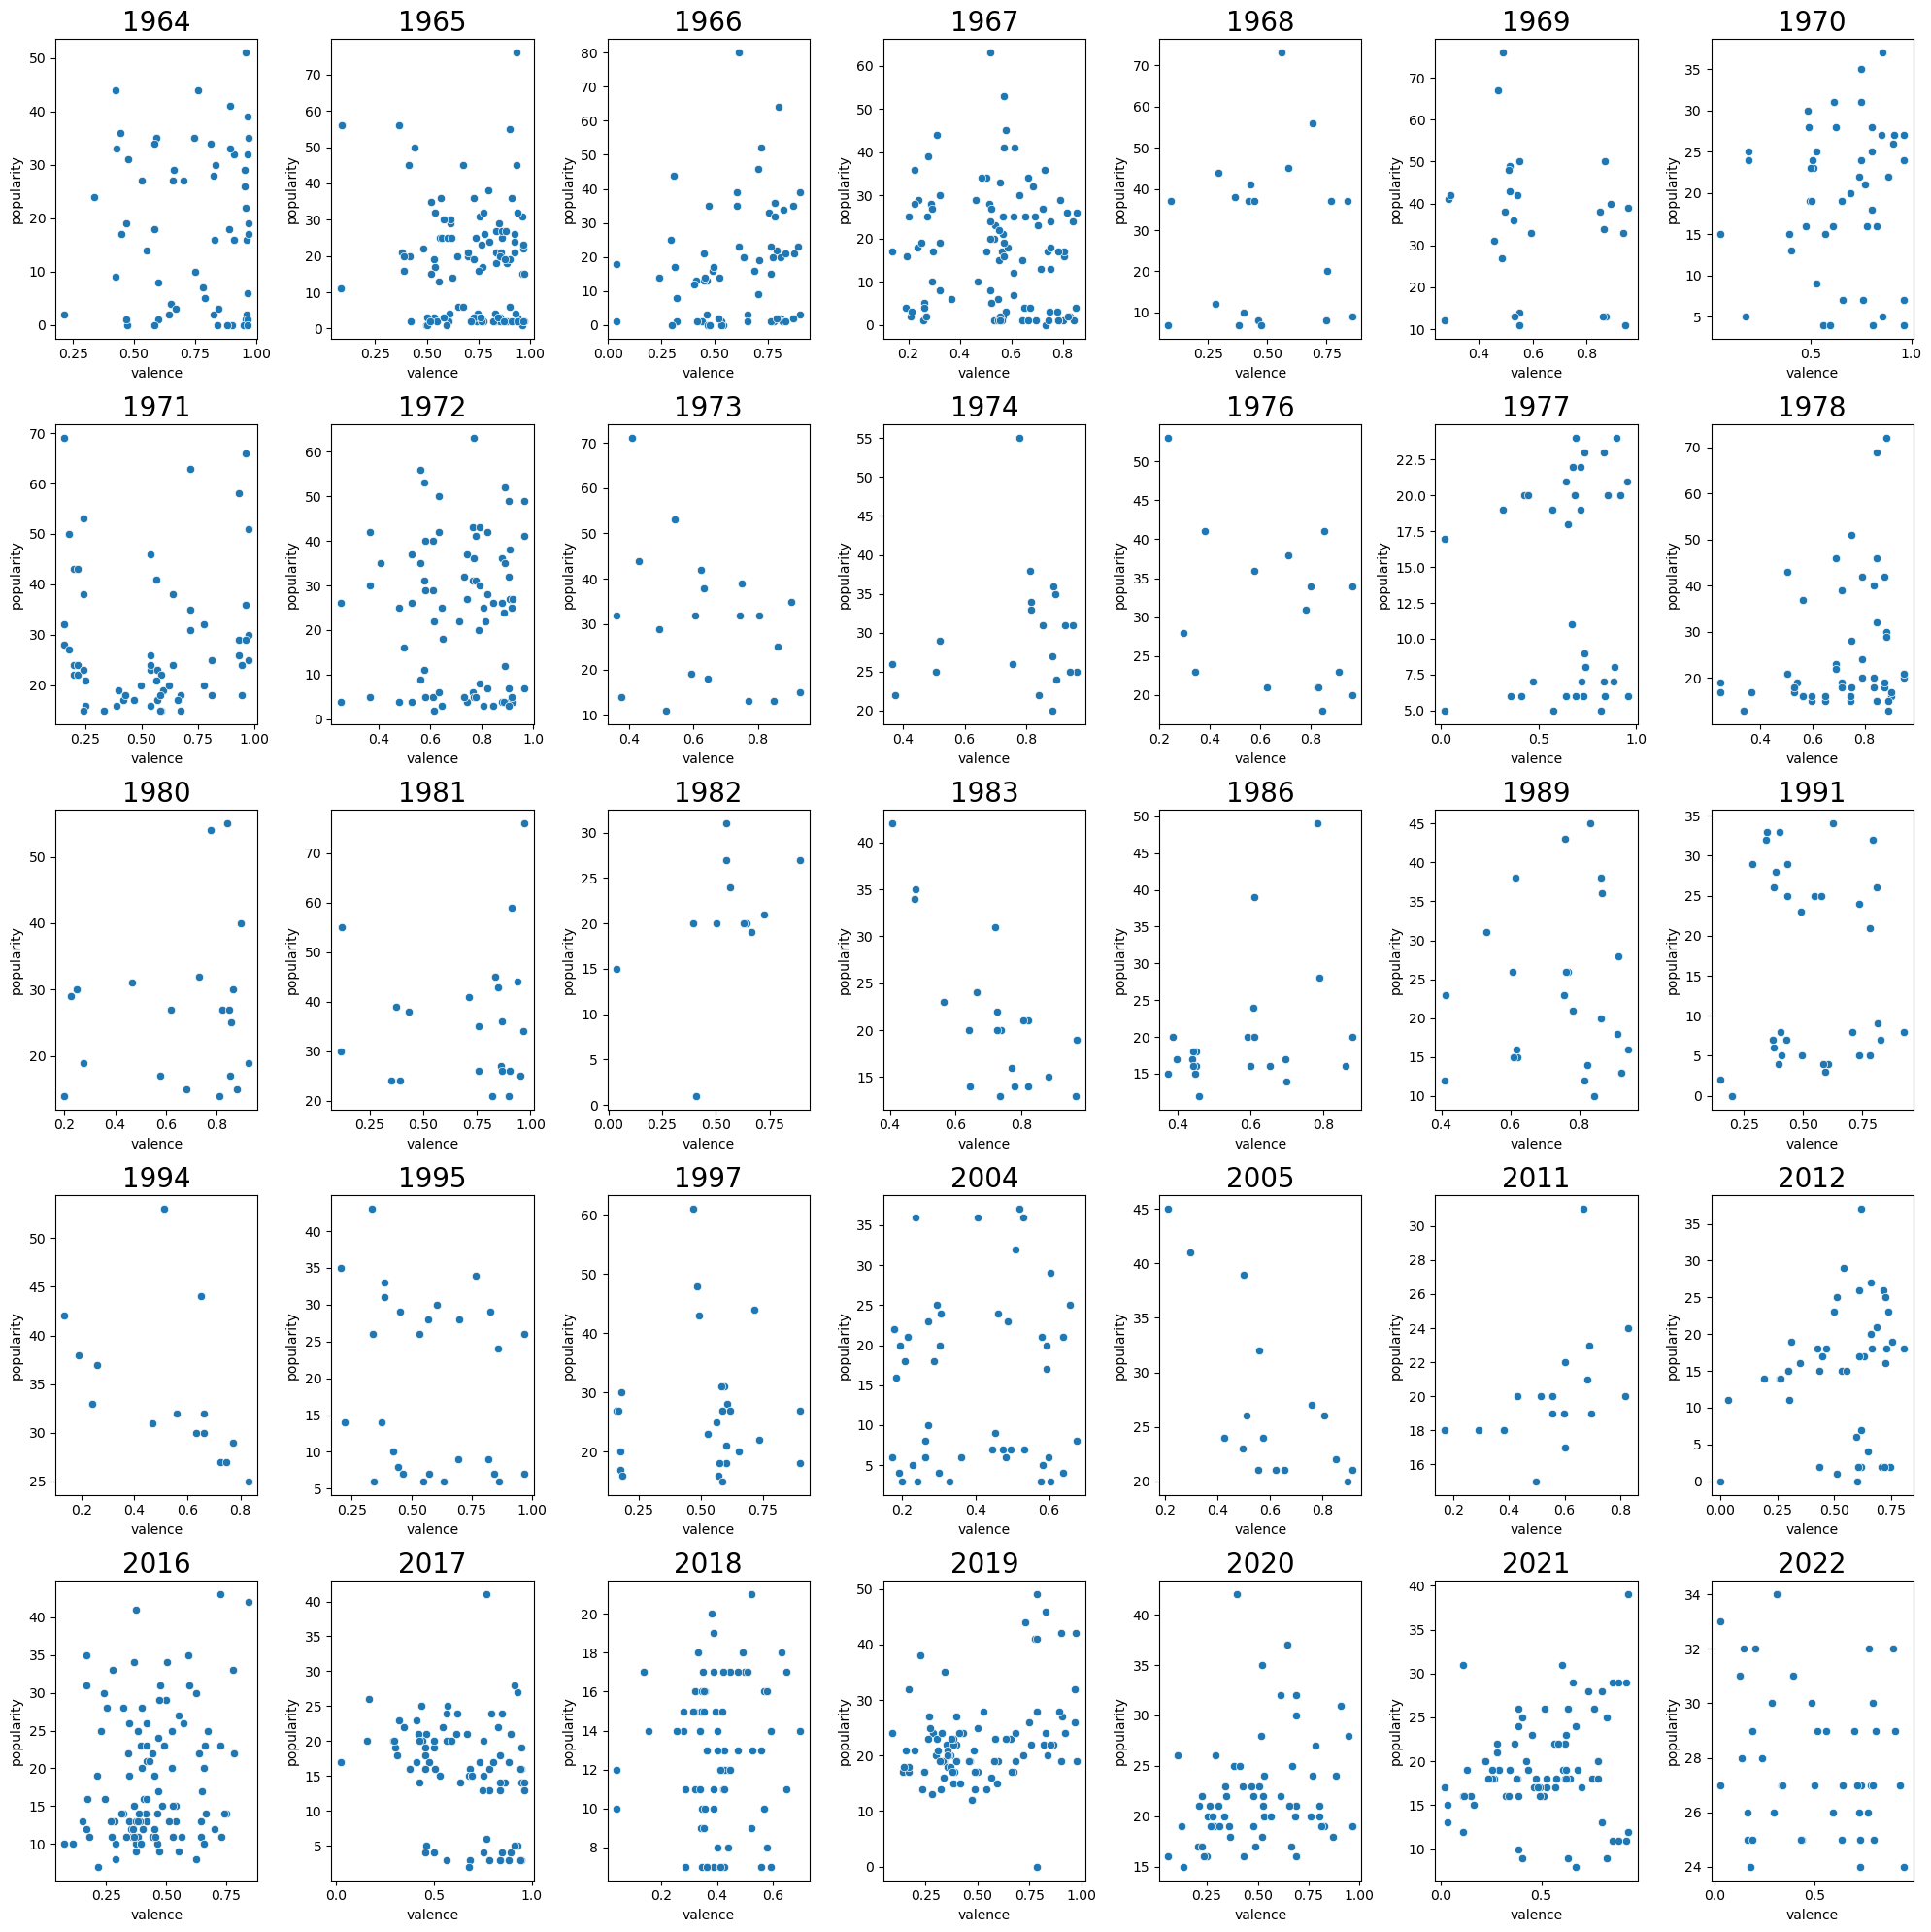

In [31]:
fig,ax=plt.subplots(5,7,figsize=(20,20))
for year,ax in zip(years,ax.flatten()):
    temp_df=df[df['release_date'].dt.year==year]
    sns.scatterplot(data=temp_df,x='valence',y='popularity',ax=ax)
    ax.set_title(year,fontsize=20)
plt.tight_layout()
plt.show()

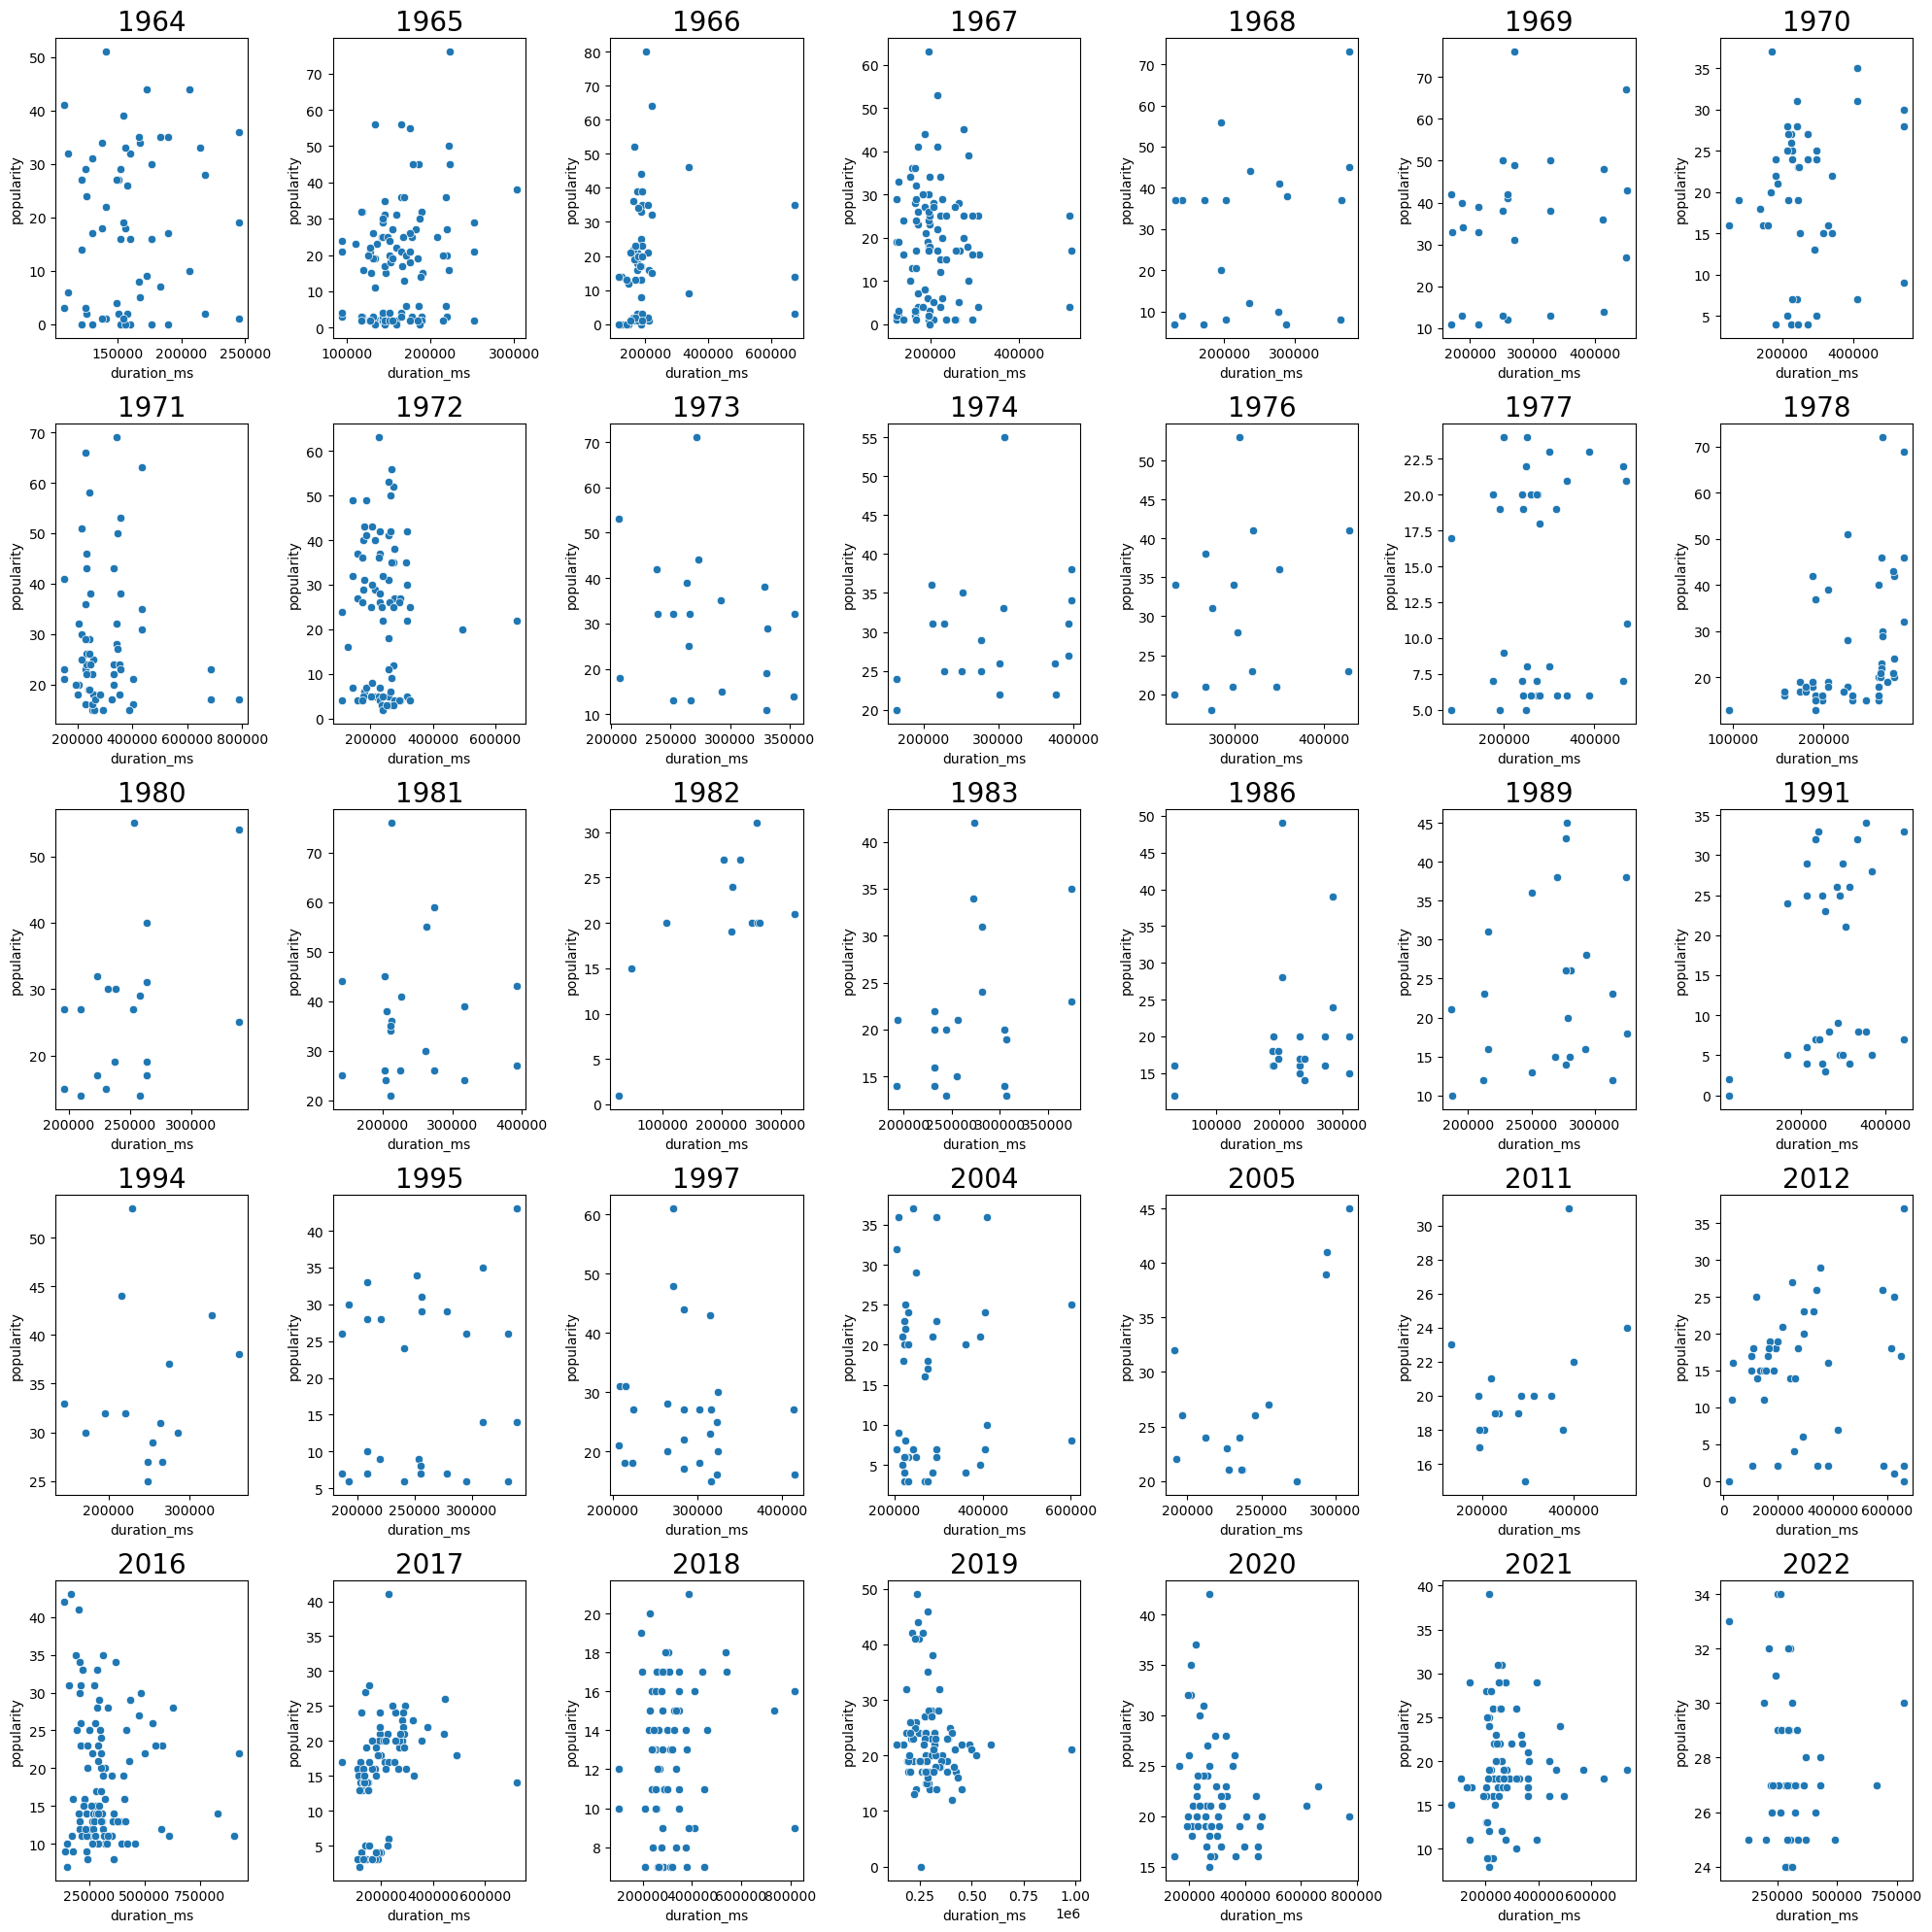

In [32]:
fig,ax=plt.subplots(5,7,figsize=(20,20))
for year,ax in zip(years,ax.flatten()):
    temp_df=df[df['release_date'].dt.year==year]
    sns.scatterplot(data=temp_df,x='duration_ms',y='popularity',ax=ax)
    ax.set_title(year,fontsize=20)
plt.tight_layout()
plt.show()

#### Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations.

Dimensionality reduction techniques are vital in machine learning and data analysis because they solve the curse of dimensionality, improve visualization, reduce computing complexity, remove noise, prevent overfitting, and allow for feature selection and extraction. Both researchers and practitioners can use these strategies to create more accurate, efficient, and interpretable machine learning models. One of the methods to address this is by using Principal Component Analysis which is used in machine learning and data analysis to reduce the number of features or variables in a dataset while retaining as much information as possible.

### Perform Cluster Analysis:

#### Identify the right number of clusters

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
model_df=df.copy()

In [34]:
def model_preprocessing_df(data,drop_cols,scaling_type=StandardScaler,pca_n_component=0.95):
    X=data.drop(drop_cols,axis=1)
    scaler=scaling_type()
    scale_song_df=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    scale_song=scaler.fit_transform(X)
    pca=PCA(n_components=pca_n_component)
    result_arr=pca.fit_transform(scale_song)
    n_cols=result_arr.shape[1]
    comp_name=['Component '+str(x) for x in range(n_cols)] 
    result_df=pd.DataFrame(result_arr,columns=comp_name)
    return result_df,result_arr

In [35]:
drop_cols=['track_number','name','album','release_date','id','uri']
model_pca_df,model_pca_arr=model_preprocessing_df(model_df,drop_cols,MinMaxScaler,2)

In [36]:
model_pca_arr

array([[-0.56286482,  0.56063   ],
       [-0.56680332, -0.03255373],
       [-0.55333336,  0.11399899],
       ...,
       [ 0.60687653, -0.041399  ],
       [ 0.48296268, -0.21946384],
       [ 0.53513978,  0.12401818]])

In [37]:
def num_cluster(df):
    wcss={}
    for i in range(1,15):
        kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
        kmeans.fit(df)
        wcss[i]=kmeans.inertia_
    plt.plot(wcss.keys(),wcss.values(),'bs-')
    plt.xlabel('Values of K')
    plt.ylabel('WCSS')
    plt.show()

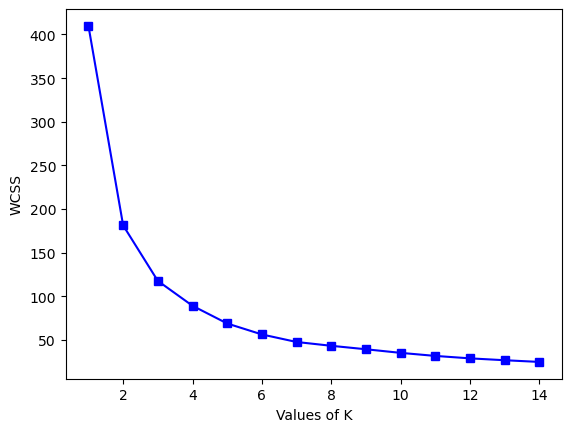

In [39]:
num_cluster(model_pca_df)
plt.show()

Observation:
- From the elbow graph the appropriate number of cluster seems to be 8

#### Use appropriate clustering algorithm

In [40]:
kmeans=KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
y_kmeans=kmeans.fit_predict(model_pca_arr)

In [41]:
y_kmeans

array([3, 1, 1, ..., 0, 0, 0])

In [42]:
def plot_cluster_2d(df,model):
    plt.title('K-Means Clustering Results w/ K=2')
    plt.scatter(df[:,0], df[:,1], s=40, c=model.labels_, cmap=plt.cm.prism)
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='o', s=400, c='k', linewidth=2)
    plt.gcf().set_size_inches(18.5, 10.5)

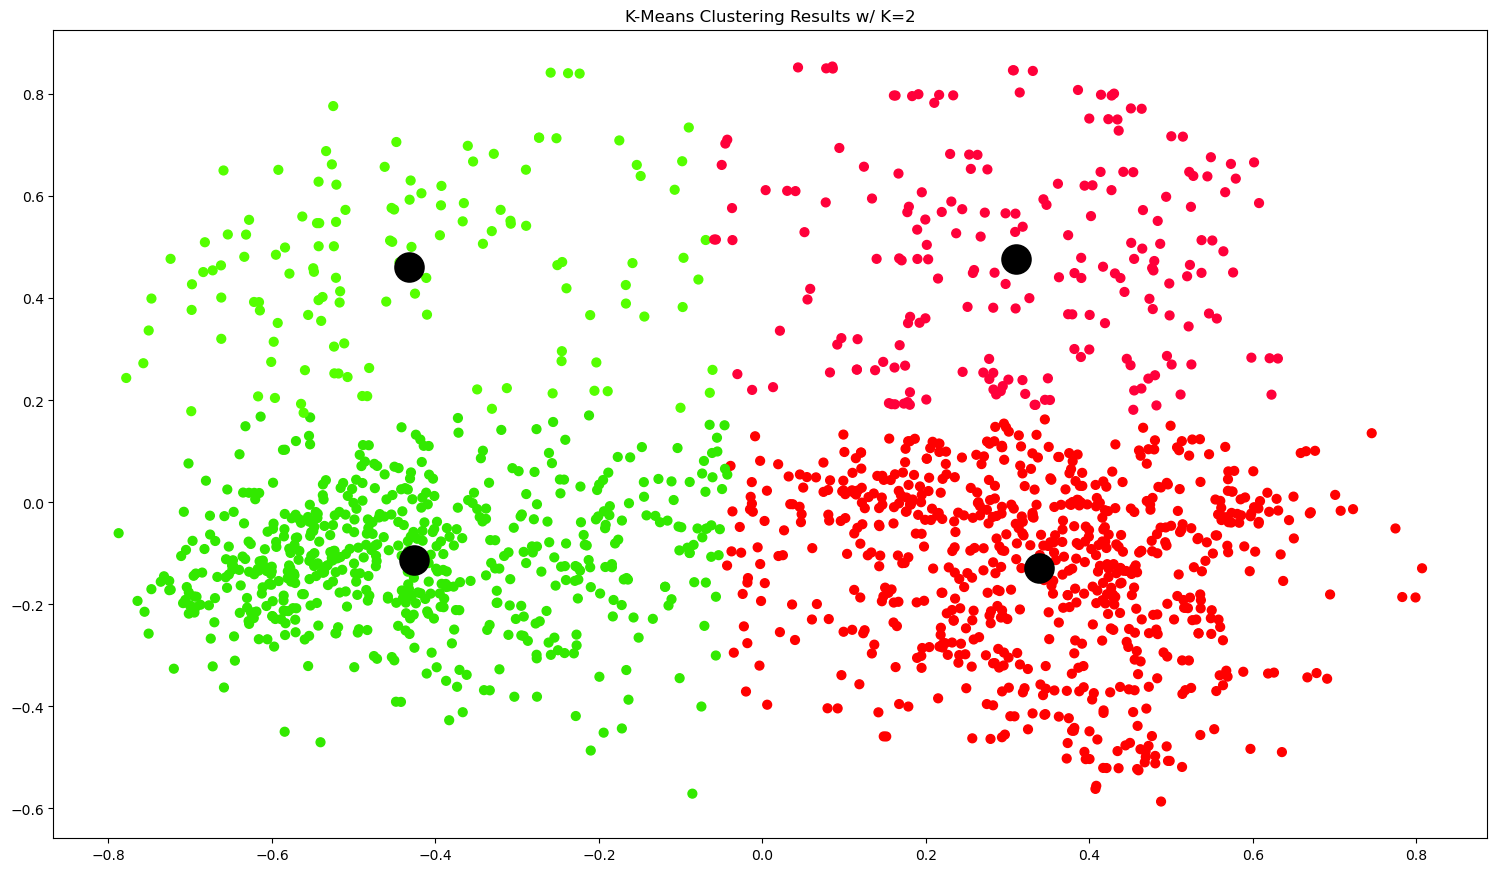

In [43]:
plot_cluster_2d(model_pca_arr,kmeans)

#### Define each cluster based on the features

In [44]:
df_cluster=df.copy()

In [45]:
df_cluster['cluster']=y_kmeans

In [46]:
df_cluster

name               album release_date  \
0      Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1      Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2              Start Me Up - Live  Licked Live In NYC   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4               Don’t Stop - Live  Licked Live In NYC   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
0                1  2IEkywLJ4ykbhi1yRQvmsT   
1                2  6GVgVJBKkGJoRfarYRvGTU   
2                3  1Lu761pZ0dBTGpzxaQoZNW   
3                4  1agTQzOTUnGNggyckEqiDH   
4                5  7piGJR8YndQBQWVXv6KtQw   
...            ...                     ...   
1605             8  08l7M5UpRnffGl0FyuRiQZ   
1606             9  3JZllQBsTM6WwoJdzFDLhx   
1607            10  0t2qvfSBQ3Y08lzRRoVTdb   
1608            11  5ivIs5vwSj0RChOIvlY3On   
1609            12  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   
1     spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   
2     spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   
3     spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670         0.369   
4     spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   
...                                    ...           ...           ...   
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ        0.1570         0.466   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx        0.0576         0.509   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb        0.3710         0.790   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On        0.2170         0.700   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   
1      0.965          0.233000    0.9610    -4.803       0.0759  131.455   
2      0.969          0.400000    0.9560    -4.936       0.1150  130.066   
3      0.985          0.000107    0.8950    -5.535       0.1930  132.994   
4      0.969          0.055900    0.9660    -5.098       0.0930  130.533   
...      ...               ...       ...       ...          ...      ...   
1605   0.932          0.006170    0.3240    -9.214       0.0429  177.340   
1606   0.706          0.000002    0.5160    -9.427       0.0843  122.015   
1607   0.774          0.000000    0.0669    -7.961       0.0720   97.035   
1608   0.546          0.000070    0.1660    -9.567       0.0622  102.634   
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   

      valence  popularity  duration_ms  cluster  
0      0.0302          33        48640        3  
1      0.3180          34       253173        1  
2      0.3130          34       263160        1  
3      0.1470          32       305880        1  
4      0.2060          32       305106        1  
...       ...         ...          ...      ...  
1605   0.9670          39       154080        0  
1606   0.4460          36       245266        0  
1607   0.8350          30       176080        0  
1608   0.5320          27       121680        0  
1609   0.9690          35       189186        0  

[1610 rows x 18 columns]